In [1]:
#!pip install pandas-profiling 

In [2]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [3]:
hmda = pd.read_csv('hmda_2021_tn.csv')

C:\Users\chern\AppData\Local\Temp\ipykernel_3452\1341907370.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  hmda = pd.read_csv('hmda_2021_tn.csv')


In [4]:
hmda.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,54930034MNPILHP25H80,28940,TN,47093.0,4.709301e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3760,11.73,69100,269,1171,1273,22
1,2021,54930034MNPILHP25H80,34980,TN,47037.0,4.703702e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,6513,35.18,79200,108,1363,1874,32
2,2021,54930034MNPILHP25H80,17420,TN,47011.0,4.701101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Joint,...,NaN,NaN,NaN,8602,7.11,57800,151,2433,3218,31
3,2021,54930034MNPILHP25H80,99999,TN,47051.0,4.705196e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3883,19.31,53700,102,930,1883,44
4,2021,54930034MNPILHP25H80,28940,TN,47093.0,4.709301e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,8222,16.78,69100,209,2412,2935,22


In [5]:
hmda.columns

Index(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_

In [6]:
lei_counts = hmda['lei'].value_counts()

lei_counts_df = pd.DataFrame({'lei': lei_counts.index, 'count': lei_counts.values})

In [7]:
lei_counts_df

,lei,count
0,549300FGXN1K3HLB1R50,32156
1,RVDPPPGHCGZ40J4VQ731,19246
2,EQTWLK1G7ODGC2MGLV11,18434
3,549300LYRWPSYPK6S325,17323
4,549300VNBQD8FDHF7563,14586
...,...,...
1314,549300KNZ6E1MM7RQQ04,1
1315,25490012KFFZI81TDT02,1
1316,549300VF12R0WS33KN43,1
1317,5493000BIR9N6Y5KFV24,1


In [8]:
top_40_banks = pd.read_csv('tn_institutions.csv')

In [9]:
top_40_banks

,Unnamed: 0,lei,instituion_name,count
0,0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156
1,1,RVDPPPGHCGZ40J4VQ731,PennyMac Loan,19246
2,2,EQTWLK1G7ODGC2MGLV11,Regions Bank,18434
3,3,549300LYRWPSYPK6S325,Freedom Mortgage,17323
4,4,549300VNBQD8FDHF7563,Mortgage Investors Group,14586
5,5,KB1H1DSPRFMYMCUFXT09,Wells Fargo Bank,14426
6,6,6BYL5QZYBDK8S7L73M02,U.S. Bank,13470
7,7,JJKC32MCHWDI71265Z06,Truist Bank,12961
8,8,549300AG64NHILB7ZP05,Loan Depot,10914
9,9,549300YIQ7S7Z8PIHE53,Amerisave Mortgage,10373


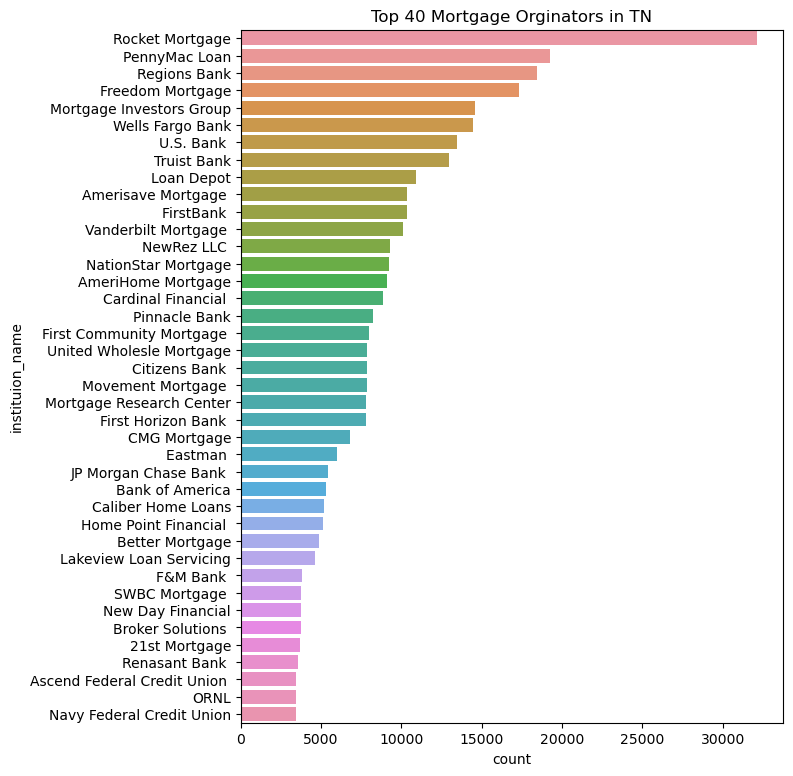

In [10]:
fig = plt.figure(figsize = (7,9))
ax1 = plt.subplot (111)
sns.barplot(data=top_40_banks, x="count", y="instituion_name")
# hide the x-axis labels
plt.title('Top 40 Mortgage Orginators in TN')
plt.show()

#top 40 banks for mortgage origination in the state of TN 

In [11]:
hmda['negative_amortization'].value_counts()
#I will exclude the negative amortization feature as a 97.54% (550,543) of the loans in this dataset are not negatively amortized. 
#2.43% (13,724) of the loans in this dataset have a negative amortization feature. And .025% (144) of loans are exempt. 

2       550543
1111     13724
1          144
Name: negative_amortization, dtype: int64

In [12]:
hmda['balloon_payment'].value_counts()
#The balloon payment feature as a 95.09% (536,721) of the loans in this dataset do not have a balloon payment feature. 
#2.47% (13,966) of the loans in this dataset have a balloon payment feature. And 2.43% (13,724) of loans are exempt. 

2       536721
1        13966
1111     13724
Name: balloon_payment, dtype: int64

In [13]:
hmda['reverse_mortgage'].value_counts(1)
#The reverse mortgage feature as a 97.36% (549,544) of the loans in this dataset do not have a reverse mortgage feature. 
#2.38% (13,477) of the loans in this dataset have a balloon payment feature. And .246% (1390) of loans are exempt.

2       0.973659
1111    0.023878
1       0.002463
Name: reverse_mortgage, dtype: float64

In [14]:
hmda['manufactured_home_secured_property_type'].value_counts()
#The manufactured home secured property type has 97.36% (549,544) of the loans in this dataset do not have a reverse mortgage feature. 
#2.38% (13,477) of the loans in this dataset have a balloon payment feature. And .246% (1390) of loans are exempt.

3       527315
1        16901
1111     13012
2         7183
Name: manufactured_home_secured_property_type, dtype: int64

In [15]:
hmda['total_units'].value_counts()

1          427088
1          130264
2            3547
24-May        949
4             699
2             696
3             539
25-49         175
>149          160
50-99         115
100-149        67
4              64
3              48
Name: total_units, dtype: int64

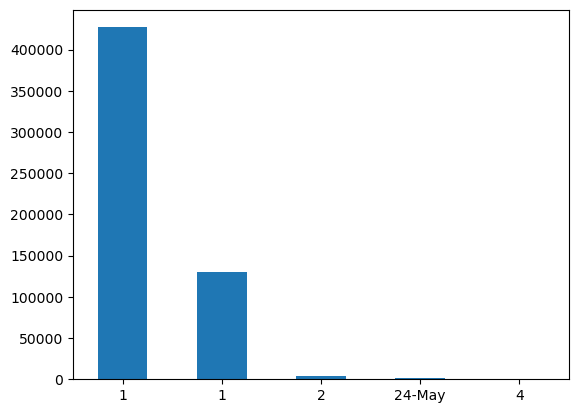

In [16]:
hmda['total_units'].value_counts().head().plot(kind= 'bar')
plt.xticks(rotation=0)
plt.show()

In [17]:
hmda['multifamily_affordable_units'].value_counts()
#The manufactured home secured property type has 97.36% (549,544) of the loans in this dataset do not have a reverse mortgage feature. 
#2.38% (13,477) of the loans in this dataset have a balloon payment feature. And .246% (1390) of loans are exempt.

Exempt    13006
0           542
0.0          83
100          53
100.0        13
8             3
97            2
13            2
75            2
86            1
20            1
35            1
23            1
80            1
83            1
40            1
71            1
14            1
1             1
25            1
2             1
10            1
Name: multifamily_affordable_units, dtype: int64

In [18]:
#will do just the top 5
loan_products = hmda['derived_loan_product_type'].value_counts().head(5).to_frame().reset_index().rename(columns = {'index' : 'loan_type', 'derived_loan_product_type' : 'count'})

In [19]:
loan_products.to_csv("loan_products.csv")

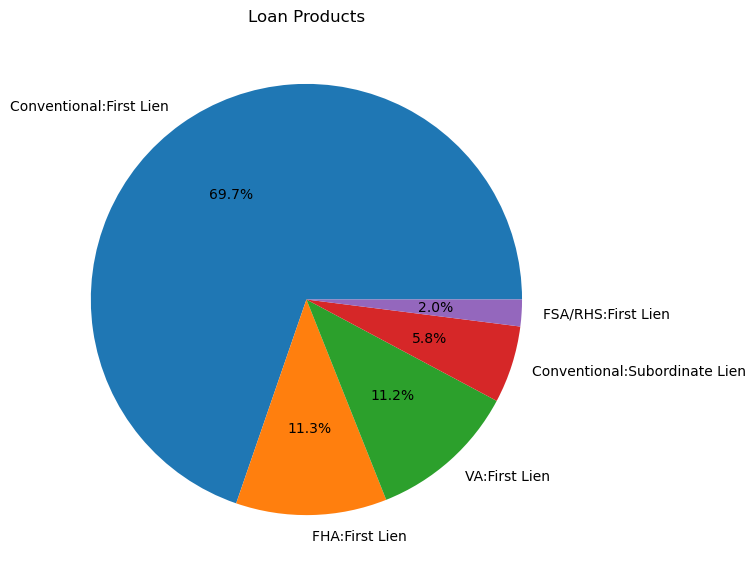

In [20]:
fig = plt.figure(1, figsize=(7,7))
ax = fig.add_subplot(111)
plt.pie(loan_products['count'], labels=loan_products['loan_type'], autopct='%1.1f%%')
plt.title('Loan Products')
plt.show()

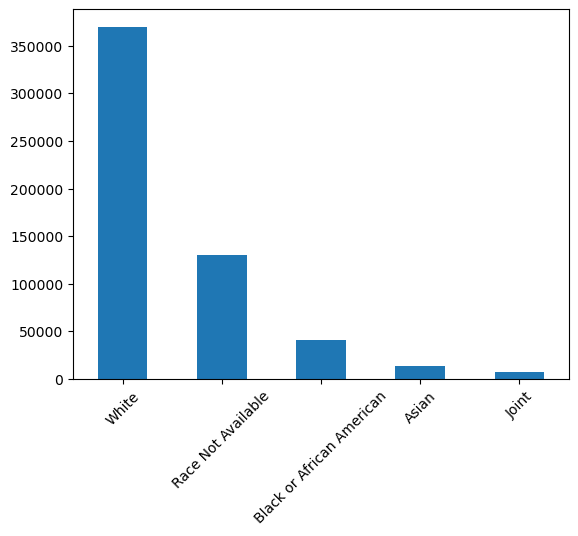

In [21]:
hmda['derived_race'].value_counts().head().plot(kind= 'bar')
plt.xticks(rotation=45)
plt.show()

In [22]:
#will show the race in a pie 
race = hmda['derived_race'].value_counts().head(6).to_frame().reset_index().rename(columns = {'index' : 'race', 'derived_race' : 'count'})

In [23]:
race.to_csv("race.csv")

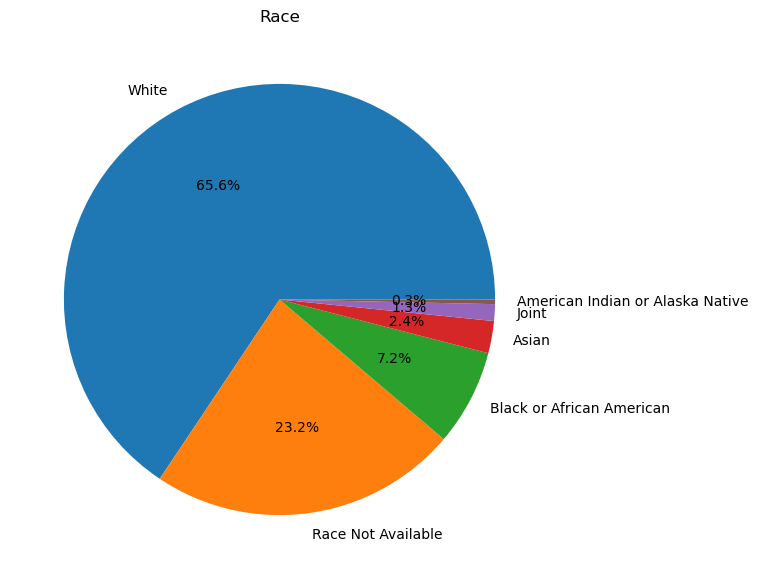

In [24]:
fig = plt.figure(1, figsize=(20,7))
ax = fig.add_subplot(111)
plt.pie(race['count'], labels=race['race'], autopct='%1.1f%%')
plt.title('Race')
plt.show()

In [25]:
#excluding census-tract since this is a duplicate field. Excluding preapproval as this field is not relevant, there are other 
#fields that will provide details on the final decision of the loan. Excluding other nonamortizing features as it is not needed.
#Excluding construction_method as it is not relevant. 
hmda_mod = hmda.drop(columns = ['census_tract', 'preapproval','other_nonamortizing_features', 'construction_method',
       'manufactured_home_land_property_interest', 'multifamily_affordable_units',
       'submission_of_application',
       'initially_payable_to_institution', 'aus-1', 'aus-2', 'aus-3', 'aus-4',
       'aus-5','denial_reason-2', 'denial_reason-3',
       'denial_reason-4'])

In [26]:
hmda_mod.head()

,activity_year,lei,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,...,applicant_age_above_62,co-applicant_age_above_62,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,54930034MNPILHP25H80,28940,TN,47093.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,No,No,10,3760,11.73,69100,269,1171,1273,22
1,2021,54930034MNPILHP25H80,34980,TN,47037.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,...,Yes,Yes,10,6513,35.18,79200,108,1363,1874,32
2,2021,54930034MNPILHP25H80,17420,TN,47011.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,...,No,No,10,8602,7.11,57800,151,2433,3218,31
3,2021,54930034MNPILHP25H80,99999,TN,47051.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,No,NaN,10,3883,19.31,53700,102,930,1883,44
4,2021,54930034MNPILHP25H80,28940,TN,47093.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,No,No,10,8222,16.78,69100,209,2412,2935,22


In [27]:
column_names = ['denial_reason-1']

replace_dict = {1: "DTI", 2: "Employment History", 3: "Credit History", 4: "Collateral", 5: "Insufficient Assets",
                6: "Unverifiable Information", 7: "Incomplete Application", 8: "Mortgage Insurance Denied", 9: "Other", 10: "NA", 1111: "NA"}

hmda_mod[column_names] = hmda_mod[column_names].replace(replace_dict)

In [28]:
hmda_mod.head()

,activity_year,lei,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,...,applicant_age_above_62,co-applicant_age_above_62,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,54930034MNPILHP25H80,28940,TN,47093.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,No,No,NA,3760,11.73,69100,269,1171,1273,22
1,2021,54930034MNPILHP25H80,34980,TN,47037.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,...,Yes,Yes,NA,6513,35.18,79200,108,1363,1874,32
2,2021,54930034MNPILHP25H80,17420,TN,47011.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,...,No,No,NA,8602,7.11,57800,151,2433,3218,31
3,2021,54930034MNPILHP25H80,99999,TN,47051.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,No,NaN,NA,3883,19.31,53700,102,930,1883,44
4,2021,54930034MNPILHP25H80,28940,TN,47093.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,No,No,NA,8222,16.78,69100,209,2412,2935,22


In [29]:
column_names = ['derived_msa-md']

replace_dict = {16860: "Hamilton", 17300: "Montgomery", 17420: "Bradley", 27180: "Madison", 27740: "Washington",
                28700: "Kingsport-Bristol", 28940: "Knox", 32820: "Shelby", 34100: "Morristown", 34980: "Davidson", 99999: "Non-Metro", 0: "Missing Code"}

hmda_mod[column_names] = hmda_mod[column_names].replace(replace_dict)

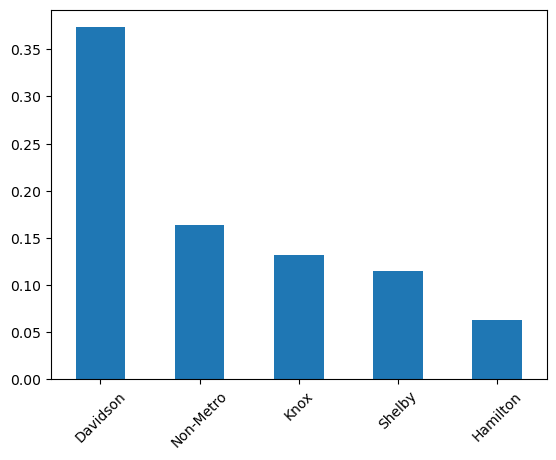

In [30]:
hmda_mod['derived_msa-md'].value_counts(1).head().plot(kind= 'bar') 
plt.xticks(rotation=45)
plt.show()


In [31]:
hmda_mod['denial_reason-1'].dropna().value_counts()

NA                           501135
Credit History                18783
DTI                           16160
Incomplete Application         9759
Collateral                     6892
Other                          5612
Unverifiable Information       3334
Insufficient Assets            1676
Employment History             1034
Mortgage Insurance Denied        26
Name: denial_reason-1, dtype: int64

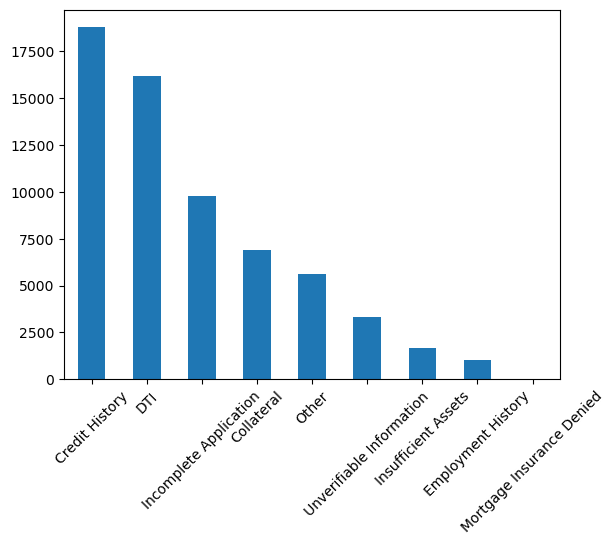

In [32]:
#I am only accounting for the bottom 9 as these are true decline reasons. NA means that the mortgage was approved. I want to
#isolate the decline reasons to dig into them further. 18,783 declined for credit history, 16,160 for DTI, 9759 for incomplete
#application, 6892 for collateral, 5612 for other, 3334 for unverifiable information, 1676 for insufficient assests,
#1034 for employment history, and 26 for mortgage insurance denied. Mortgage insurance denied really should be a byword since and
#application is usually declined for other primary reasons like DTI or LTV. 
hmda_mod['denial_reason-1'].dropna().value_counts().tail(9).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [33]:


# Group the data by denial_reason_1 and derived_race, then count the number of occurrences of each group
counts = hmda_mod.groupby(['denial_reason-1', 'derived_race'], as_index=False).size()

# Print the resulting counts
counts

,denial_reason-1,derived_race,size
0,Collateral,2 or more minority races,11
1,Collateral,American Indian or Alaska Native,48
2,Collateral,Asian,129
3,Collateral,Black or African American,604
4,Collateral,Joint,69
...,...,...,...
78,Unverifiable Information,Free Form Text Only,1
79,Unverifiable Information,Joint,39
80,Unverifiable Information,Native Hawaiian or Other Pacific Islander,6
81,Unverifiable Information,Race Not Available,588


In [34]:
counts.rename(columns= {'denial_reason-1': 'denial_reason', 'size':'count'}, inplace=True)

In [35]:
counts.to_csv("counts.csv")

In [36]:
# exclude specified values from denial_reasons-1 and derived_race columns
excluded_values = ['NA', 'Other', 'Free Form Text Only', 'Joint', 'Race Not Available']
counts_mod = counts[~counts['denial_reason'].isin(excluded_values)
                   & ~counts['derived_race'].isin(excluded_values)]
counts_mod.to_csv("counts_mod.csv")

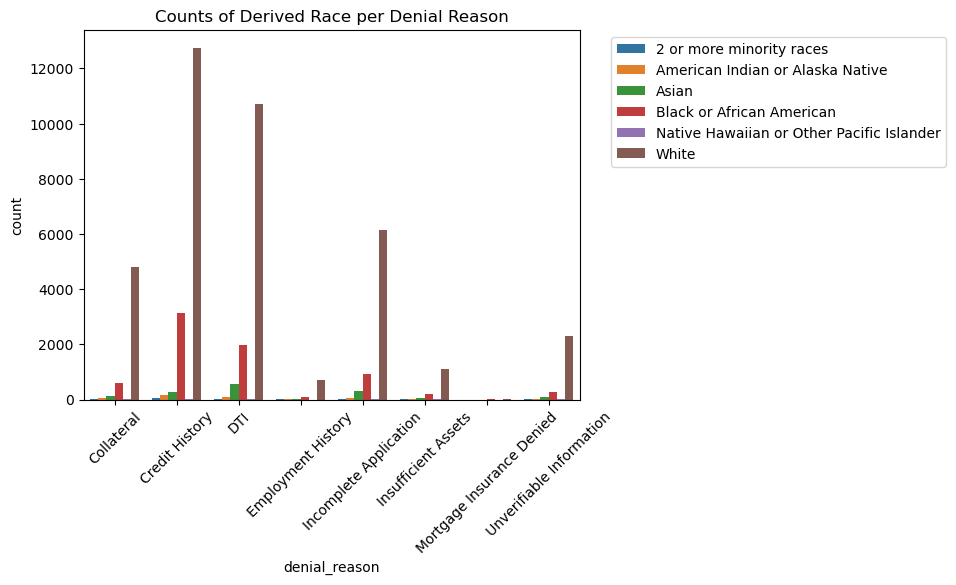

In [37]:
# Create the plot
sns.barplot(x='denial_reason', y='count', hue='derived_race', data=counts_mod)

# Add a title
plt.title('Counts of Derived Race per Denial Reason')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
# Show the plot
plt.show()

#White overwhelms the remaining data making it difficult to really see any trends 

In [38]:
hmda_mod 
#I would like to cre

,activity_year,lei,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,...,applicant_age_above_62,co-applicant_age_above_62,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,54930034MNPILHP25H80,Knox,TN,47093.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,No,No,NA,3760,11.73,69100,269,1171,1273,22
1,2021,54930034MNPILHP25H80,Davidson,TN,47037.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,...,Yes,Yes,NA,6513,35.18,79200,108,1363,1874,32
2,2021,54930034MNPILHP25H80,Bradley,TN,47011.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,...,No,No,NA,8602,7.11,57800,151,2433,3218,31
3,2021,54930034MNPILHP25H80,Non-Metro,TN,47051.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,No,NaN,NA,3883,19.31,53700,102,930,1883,44
4,2021,54930034MNPILHP25H80,Knox,TN,47093.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,No,No,NA,8222,16.78,69100,209,2412,2935,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564406,2021,54930034MNPILHP25H80,Morristown,TN,47089.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,No,NaN,NA,7075,2.59,56300,101,2182,3192,21
564407,2021,54930034MNPILHP25H80,Shelby,TN,47157.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,...,No,NaN,NA,7759,70.77,66900,41,1111,2467,59
564408,2021,54930034MNPILHP25H80,Knox,TN,47009.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,Yes,Yes,NA,3147,4.16,69100,133,1165,1544,28
564409,2021,5493002XCPKQYCZ56W55,Non-Metro,TN,47095.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,...,NaN,NaN,NA,5253,40.28,53700,83,704,1346,44


In [39]:
hmda_inst = pd.merge(top_40_banks, hmda_mod,
        on= ['lei'], how='outer')
hmda_inst

,Unnamed: 0,lei,instituion_name,count,activity_year,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,...,applicant_age_above_62,co-applicant_age_above_62,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Knox,TN,47093.0,C,FHA:First Lien,...,No,NaN,NA,4381,10.89,69100,84,1194,1717,55
1,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47149.0,C,Conventional:First Lien,...,No,No,NA,5716,21.90,79200,128,1601,1881,19
2,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Knox,TN,47093.0,C,Conventional:First Lien,...,No,NaN,NA,3568,24.44,69100,67,983,1510,63
3,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47037.0,C,Conventional:First Lien,...,Yes,Yes,NA,4035,25.43,79200,162,1470,1512,13
4,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47149.0,C,Conventional:First Lien,...,Yes,NaN,NA,4740,40.17,79200,74,642,995,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564406,NaN,2549005SIVTHG14U2905,NaN,NaN,2021,Knox,TN,47093.0,C,Conventional:First Lien,...,No,Yes,NA,7158,16.68,69100,65,222,895,40
564407,NaN,2549005SIVTHG14U2905,NaN,NaN,2021,Non-Metro,TN,47155.0,NC,Conventional:First Lien,...,No,NaN,NA,6054,10.34,53700,91,1324,4640,20
564408,NaN,2549005SIVTHG14U2905,NaN,NaN,2021,Non-Metro,TN,47155.0,C,Conventional:First Lien,...,No,NaN,NA,4006,3.87,53700,96,1229,3795,22
564409,NaN,5493002XCPKQYCZ56W55,NaN,NaN,2021,Non-Metro,TN,47095.0,C,Conventional:First Lien,...,NaN,NaN,NA,5253,40.28,53700,83,704,1346,44


In [40]:
hmda_inst.rename(columns= {'denial_reason-1': 'denial_reason', 'size':'count'}, inplace=True)

In [41]:
hmda_inst['approval_status'] = hmda_inst['denial_reason'].apply(lambda x: 'approval' if x == 'NA' else 'Denial')

In [42]:
#% of files that are approved in the dataframe. NA are files that are approved
na_approvals_pct = (hmda_inst['denial_reason'].value_counts()['NA'] / hmda_inst.shape[0]) * 100
print(f"Percentage of approved files: {na_approvals_pct:.2f}%")


Percentage of approved files: 88.79%


In [43]:
hmda_inst

,Unnamed: 0,lei,instituion_name,count,activity_year,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,...,co-applicant_age_above_62,denial_reason,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,approval_status
0,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Knox,TN,47093.0,C,FHA:First Lien,...,NaN,NA,4381,10.89,69100,84,1194,1717,55,approval
1,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47149.0,C,Conventional:First Lien,...,No,NA,5716,21.90,79200,128,1601,1881,19,approval
2,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Knox,TN,47093.0,C,Conventional:First Lien,...,NaN,NA,3568,24.44,69100,67,983,1510,63,approval
3,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47037.0,C,Conventional:First Lien,...,Yes,NA,4035,25.43,79200,162,1470,1512,13,approval
4,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47149.0,C,Conventional:First Lien,...,NaN,NA,4740,40.17,79200,74,642,995,17,approval
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564406,NaN,2549005SIVTHG14U2905,NaN,NaN,2021,Knox,TN,47093.0,C,Conventional:First Lien,...,Yes,NA,7158,16.68,69100,65,222,895,40,approval
564407,NaN,2549005SIVTHG14U2905,NaN,NaN,2021,Non-Metro,TN,47155.0,NC,Conventional:First Lien,...,NaN,NA,6054,10.34,53700,91,1324,4640,20,approval
564408,NaN,2549005SIVTHG14U2905,NaN,NaN,2021,Non-Metro,TN,47155.0,C,Conventional:First Lien,...,NaN,NA,4006,3.87,53700,96,1229,3795,22,approval
564409,NaN,5493002XCPKQYCZ56W55,NaN,NaN,2021,Non-Metro,TN,47095.0,C,Conventional:First Lien,...,NaN,NA,5253,40.28,53700,83,704,1346,44,approval


# What is the % of denial and approval per race?

In [44]:
#% of denial per race 

race_denial_pct = hmda_inst.groupby('derived_race')['approval_status'].apply(lambda x: (x == 'Denial').sum() / len(x) * 100)

# Convert the series to a dataframe
race_denial_df = race_denial_pct.to_frame().reset_index()

# Rename the columns of the dataframe
race_denial_df.columns = ['race', 'denial_percentage']

# Print the dataframe
race_denial_df

,race,denial_percentage
0,2 or more minority races,21.452145
1,American Indian or Alaska Native,21.620227
2,Asian,11.487482
3,Black or African American,19.576680
4,Free Form Text Only,35.897436
5,Joint,11.631206
6,Native Hawaiian or Other Pacific Islander,20.672269
7,Race Not Available,7.660576
8,White,11.437832


In [45]:
race_approval_pct = hmda_inst.groupby('derived_race')['approval_status'].apply(lambda x: (x == 'approval').sum() / len(x) * 100)

# Convert the series to a dataframe
race_approval_df = race_approval_pct.to_frame().reset_index()

# Rename the columns of the dataframe
race_approval_df.columns = ['race', 'approval_percentage']

# Print the dataframe
race_approval_df


,race,approval_percentage
0,2 or more minority races,78.547855
1,American Indian or Alaska Native,78.379773
2,Asian,88.512518
3,Black or African American,80.423320
4,Free Form Text Only,64.102564
5,Joint,88.368794
6,Native Hawaiian or Other Pacific Islander,79.327731
7,Race Not Available,92.339424
8,White,88.562168


# What is the % of denial reasons per race in Shelby County?

In [46]:
shelby_county_df = hmda_inst[hmda_inst['derived_msa-md'] == 'Shelby']
shelby_county_df

,Unnamed: 0,lei,instituion_name,count,activity_year,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,...,co-applicant_age_above_62,denial_reason,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,approval_status
9,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,No,NA,3269,11.53,66900,157,1093,1216,23,approval
11,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Shelby,TN,47157.0,C,VA:First Lien,...,No,NA,9593,21.10,66900,170,2331,2782,11,approval
13,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,NaN,NA,5685,95.62,66900,81,1074,1732,50,approval
15,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Shelby,TN,47157.0,C,FHA:First Lien,...,NaN,NA,3094,67.07,66900,41,439,1472,62,approval
27,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Shelby,TN,47157.0,C,FHA:First Lien,...,Yes,NA,3269,11.53,66900,157,1093,1216,23,approval
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564364,NaN,254900U2ZPLWQTSD3158,NaN,NaN,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,NaN,NA,8790,63.37,66900,92,2153,2921,16,approval
564365,NaN,254900U2ZPLWQTSD3158,NaN,NaN,2021,Shelby,TN,47157.0,C,FHA:First Lien,...,NaN,Credit History,6125,89.62,66900,118,1636,2143,30,Denial
564366,NaN,254900U2ZPLWQTSD3158,NaN,NaN,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,NaN,NA,5187,36.23,66900,159,1267,1603,30,approval
564367,NaN,254900U2ZPLWQTSD3158,NaN,NaN,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,NaN,NA,8600,18.14,66900,199,2594,2999,13,approval


In [47]:
#% of denial per race in Shelby County

race_denial_pct1 = shelby_county_df.groupby('derived_race')['approval_status'].apply(lambda x: (x == 'Denial').sum() / len(x) * 100)

# Convert the series to a dataframe
race_denial_df1 = race_denial_pct1.to_frame().reset_index()

# Rename the columns of the dataframe
race_denial_df1.columns = ['race', 'denial_percentage']

# Print the dataframe
race_denial_df1

,race,denial_percentage
0,2 or more minority races,23.926380
1,American Indian or Alaska Native,19.631902
2,Asian,9.377344
3,Black or African American,21.522199
4,Free Form Text Only,42.857143
5,Joint,9.428571
6,Native Hawaiian or Other Pacific Islander,24.657534
7,Race Not Available,8.601841
8,White,9.163132


In [48]:
#% of approvals per race in Shelby County 
race_approval_pct1 = shelby_county_df.groupby('derived_race')['approval_status'].apply(lambda x: (x == 'approval').sum() / len(x) * 100)

# Convert the series to a dataframe
race_approval_df1 = race_approval_pct1.to_frame().reset_index()

# Rename the columns of the dataframe
race_approval_df1.columns = ['race', 'approval_percentage']

# Print the dataframe
race_approval_df1

,race,approval_percentage
0,2 or more minority races,76.073620
1,American Indian or Alaska Native,80.368098
2,Asian,90.622656
3,Black or African American,78.477801
4,Free Form Text Only,57.142857
5,Joint,90.571429
6,Native Hawaiian or Other Pacific Islander,75.342466
7,Race Not Available,91.398159
8,White,90.836868


# What is the % of denial reasons per race in Davidson County?

In [49]:
davidson_county_df = hmda_inst[hmda_inst['derived_msa-md'] == 'Davidson']
davidson_county_df

,Unnamed: 0,lei,instituion_name,count,activity_year,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,...,co-applicant_age_above_62,denial_reason,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,approval_status
1,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47149.0,C,Conventional:First Lien,...,No,NA,5716,21.90,79200,128,1601,1881,19,approval
3,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47037.0,C,Conventional:First Lien,...,Yes,NA,4035,25.43,79200,162,1470,1512,13,approval
4,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47149.0,C,Conventional:First Lien,...,NaN,NA,4740,40.17,79200,74,642,995,17,approval
6,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47043.0,C,Conventional:First Lien,...,NaN,NA,6022,9.08,79200,97,1884,2485,27,approval
7,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47037.0,C,Conventional:First Lien,...,NaN,NA,5231,9.65,79200,253,1498,1771,50,approval
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564393,NaN,2549005SIVTHG14U2905,NaN,NaN,2021,Davidson,TN,47187.0,C,Conventional:First Lien,...,NaN,NA,24746,14.68,79200,138,6228,7250,11,approval
564395,NaN,2549005SIVTHG14U2905,NaN,NaN,2021,Davidson,TN,47037.0,C,Conventional:First Lien,...,No,NA,1803,93.07,79200,46,227,968,57,approval
564398,NaN,2549005SIVTHG14U2905,NaN,NaN,2021,Davidson,TN,47165.0,C,Conventional:First Lien,...,NaN,NA,5755,15.67,79200,112,1836,2172,44,approval
564399,NaN,2549005SIVTHG14U2905,NaN,NaN,2021,Davidson,TN,47119.0,C,Conventional:First Lien,...,NaN,NA,4769,19.08,79200,46,984,1962,53,approval


In [50]:
#% of denial per race in Davidson County

race_denial_pct2 = davidson_county_df.groupby('derived_race')['approval_status'].apply(lambda x: (x == 'Denial').sum() / len(x) * 100)

# Convert the series to a dataframe
race_denial_df2 = race_denial_pct2.to_frame().reset_index()

# Rename the columns of the dataframe
race_denial_df2.columns = ['race', 'denial_percentage']

# Print the dataframe
race_denial_df2

,race,denial_percentage
0,2 or more minority races,16.756757
1,American Indian or Alaska Native,18.125000
2,Asian,11.548704
3,Black or African American,17.871865
4,Free Form Text Only,45.000000
5,Joint,10.145959
6,Native Hawaiian or Other Pacific Islander,25.714286
7,Race Not Available,6.721680
8,White,9.850107


In [51]:
#% of approvals per race in Davidson County 
race_approval_pct2 = davidson_county_df.groupby('derived_race')['approval_status'].apply(lambda x: (x == 'approval').sum() / len(x) * 100)

# Convert the series to a dataframe
race_approval_df2 = race_approval_pct2.to_frame().reset_index()

# Rename the columns of the dataframe
race_approval_df2.columns = ['race', 'approval_percentage']

# Print the dataframe
race_approval_df2

,race,approval_percentage
0,2 or more minority races,83.243243
1,American Indian or Alaska Native,81.875000
2,Asian,88.451296
3,Black or African American,82.128135
4,Free Form Text Only,55.000000
5,Joint,89.854041
6,Native Hawaiian or Other Pacific Islander,74.285714
7,Race Not Available,93.278320
8,White,90.149893


# What is the % of denial reasons per race in Davidson County?


In [52]:
davidson_df = davidson_county_df[(davidson_county_df['denial_reason'] != 'NA')]
davidson_df


,Unnamed: 0,lei,instituion_name,count,activity_year,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,...,co-applicant_age_above_62,denial_reason,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,approval_status
25873,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47037.0,C,Conventional:First Lien,...,NaN,Collateral,6265,59.17,79200,76,1031,1601,30,Denial
25881,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47037.0,C,Conventional:First Lien,...,NaN,Credit History,1994,14.94,79200,127,620,1151,67,Denial
25884,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47037.0,NC,Conventional:First Lien,...,No,Other,3269,74.21,79200,43,332,882,45,Denial
25885,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47119.0,C,Conventional:First Lien,...,NaN,Incomplete Application,4539,13.13,79200,125,1457,1728,32,Denial
25904,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Davidson,TN,47037.0,C,Conventional:First Lien,...,NaN,DTI,4651,61.26,79200,113,1227,1527,12,Denial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563026,NaN,Q7C315HKI8VX0SSKBS64,NaN,NaN,2021,Davidson,TN,47165.0,C,Conventional:Subordinate Lien,...,NaN,DTI,6557,11.48,79200,131,1985,2310,27,Denial
563032,NaN,Q7C315HKI8VX0SSKBS64,NaN,NaN,2021,Davidson,TN,47187.0,NC,Conventional:Subordinate Lien,...,NaN,DTI,7202,23.92,79200,216,1566,1728,15,Denial
563052,NaN,549300CYL5ZW4ISL7T55,NaN,NaN,2021,Davidson,TN,47119.0,C,FHA:First Lien,...,NaN,Credit History,5543,6.96,79200,92,1789,2325,24,Denial
563141,NaN,5493000JFVFQFL816N45,NaN,NaN,2021,Davidson,TN,47037.0,C,Conventional:First Lien,...,NaN,Incomplete Application,2469,30.50,79200,123,407,423,31,Denial


In [53]:
denial_reason_pct_davidson = davidson_df.groupby(['derived_race', 'denial_reason'])['loan_type'].count() / davidson_df.groupby('derived_race')['loan_type'].count() * 100
print(f"Percentage of denial reasons per race in Davidson excluding NA:\n{denial_reason_pct_davidson}")


Percentage of denial reasons per race in Davidson excluding NA:
derived_race              denial_reason            
2 or more minority races  Collateral                    3.225806
                          Credit History               51.612903
                          DTI                          16.129032
                          Employment History            6.451613
                          Incomplete Application        6.451613
                                                         ...    
White                     Incomplete Application       16.803966
                          Insufficient Assets           2.990084
                          Mortgage Insurance Denied     0.007628
                          Other                         9.702517
                          Unverifiable Information      4.774981
Name: loan_type, Length: 70, dtype: float64


In [54]:
denial_reason_pct_davidson = denial_reason_pct_davidson.reset_index(name='% of Denials')

denial_reason_pct_davidson 

,derived_race,denial_reason,% of Denials
0,2 or more minority races,Collateral,3.225806
1,2 or more minority races,Credit History,51.612903
2,2 or more minority races,DTI,16.129032
3,2 or more minority races,Employment History,6.451613
4,2 or more minority races,Incomplete Application,6.451613
...,...,...,...
65,White,Incomplete Application,16.803966
66,White,Insufficient Assets,2.990084
67,White,Mortgage Insurance Denied,0.007628
68,White,Other,9.702517


denial_reason_pct_davidson.to_csv('denial_reason_pc_davidson.csv')

# What is the % of denial reasons per race in Davidson County?

In [55]:
shelby_df = shelby_county_df[(shelby_county_df['denial_reason'] != 'NA')]
shelby_df

,Unnamed: 0,lei,instituion_name,count,activity_year,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,...,co-applicant_age_above_62,denial_reason,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,approval_status
25879,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Shelby,TN,47167.0,C,FHA:First Lien,...,NaN,Collateral,4090,11.64,66900,131,1282,1586,23,Denial
25883,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,NaN,Collateral,6981,69.60,66900,60,1086,1772,38,Denial
25889,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,NaN,Other,9291,38.26,66900,179,2663,3063,14,Denial
25890,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Shelby,TN,47157.0,C,FHA:First Lien,...,NaN,Collateral,7297,39.33,66900,127,1991,2908,22,Denial
25894,0.0,549300FGXN1K3HLB1R50,Rocket Mortgage,32156.0,2021,Shelby,TN,47157.0,C,FHA:First Lien,...,NaN,Collateral,7015,56.22,66900,96,1572,2462,29,Denial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564348,NaN,254900U2ZPLWQTSD3158,NaN,NaN,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,No,Credit History,6125,89.62,66900,118,1636,2143,30,Denial
564355,NaN,254900U2ZPLWQTSD3158,NaN,NaN,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,NaN,Insufficient Assets,3475,89.81,66900,128,867,1152,20,Denial
564358,NaN,254900U2ZPLWQTSD3158,NaN,NaN,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,NaN,Unverifiable Information,3398,62.39,66900,80,839,1158,25,Denial
564360,NaN,254900U2ZPLWQTSD3158,NaN,NaN,2021,Shelby,TN,47157.0,C,Conventional:First Lien,...,NaN,Credit History,6879,95.09,66900,136,1627,2341,17,Denial


In [56]:
denial_reason_pct_shelby = shelby_df.groupby(['derived_race', 'denial_reason'])['loan_type'].count() / shelby_df.groupby('derived_race')['loan_type'].count() * 100
print(f"Percentage of denial reasons per race in Davidson excluding NA:\n{denial_reason_pct_shelby}")


Percentage of denial reasons per race in Davidson excluding NA:
derived_race                               denial_reason            
2 or more minority races                   Collateral                    5.128205
                                           Credit History               51.282051
                                           DTI                          15.384615
                                           Employment History            2.564103
                                           Incomplete Application       10.256410
                                           Other                        15.384615
American Indian or Alaska Native           Collateral                   12.500000
                                           Credit History               40.625000
                                           DTI                          28.125000
                                           Incomplete Application       15.625000
                                           Othe

In [57]:
denial_reason_pct_shelby = denial_reason_pct_shelby.reset_index(name='% of Denials')

denial_reason_pct_shelby 

,derived_race,denial_reason,% of Denials
0,2 or more minority races,Collateral,5.128205
1,2 or more minority races,Credit History,51.282051
2,2 or more minority races,DTI,15.384615
3,2 or more minority races,Employment History,2.564103
4,2 or more minority races,Incomplete Application,10.256410
5,2 or more minority races,Other,15.384615
6,American Indian or Alaska Native,Collateral,12.500000
7,American Indian or Alaska Native,Credit History,40.625000
8,American Indian or Alaska Native,DTI,28.125000
9,American Indian or Alaska Native,Incomplete Application,15.625000


# What is the % of denial per financial institution?

# What is the % of denial reasons per Financial Institution in Davidson County?

In [58]:
denial_pct3 = davidson_df.groupby(['instituion_name', 'denial_reason'])['loan_type'].count() / davidson_df.groupby(['instituion_name'])['loan_type'].count() * 100
print(f"Percentage of denial reasons per financial institution in Davidson County excluding NA:\n{denial_pct3}")


Percentage of denial reasons per financial institution in Davidson County excluding NA:
instituion_name   denial_reason           
21st Mortgage     Collateral                   0.851064
                  Credit History              49.361702
                  DTI                         30.638298
                  Employment History           0.851064
                  Incomplete Application      11.063830
                                                ...    
Wells Fargo Bank  Employment History           2.843602
                  Incomplete Application      28.436019
                  Insufficient Assets          2.053712
                  Other                       37.914692
                  Unverifiable Information     2.527646
Name: loan_type, Length: 287, dtype: float64


In [122]:
denial_per_bank = denial_pct3.reset_index()

In [125]:
denial_per_bank

,instituion_name,denial_reason,loan_type
0,21st Mortgage,Collateral,0.851064
1,21st Mortgage,Credit History,49.361702
2,21st Mortgage,DTI,30.638298
3,21st Mortgage,Employment History,0.851064
4,21st Mortgage,Incomplete Application,11.063830
...,...,...,...
282,Wells Fargo Bank,Employment History,2.843602
283,Wells Fargo Bank,Incomplete Application,28.436019
284,Wells Fargo Bank,Insufficient Assets,2.053712
285,Wells Fargo Bank,Other,37.914692


# What race has been denied the most? Is this proportionate to their population count in the county? 

In [59]:
denied_race_counts = hmda_inst[hmda_inst['denial_reason'].notna()].groupby('derived_race')['denial_reason'].count().sort_values(ascending=False)
most_denied_race = denied_race_counts.index[0]

In [60]:
most_denied_race

'White'

In [61]:
#I do belive this is proportinate to the population because Whites make up over 73% of the population within the state of TN

In [62]:
denied_race_counts = hmda_inst[hmda_inst['denial_reason'].notna()].groupby(['derived_msa-md', 'derived_race'])['denial_reason'].count().reset_index()
denied_race_counts['rank'] = denied_race_counts.groupby('derived_msa-md')['denial_reason'].rank(method='dense', ascending=False)
most_denied_races_by_msa = denied_race_counts[denied_race_counts['rank']==1]

In [63]:
most_denied_races_by_msa 

,derived_msa-md,derived_race,denial_reason,rank
7,Bradley,White,6860,1.0
16,Davidson,White,133095,1.0
24,Hamilton,White,23697,1.0
33,Kingsport-Bristol,White,11028,1.0
42,Knox,White,55416,1.0
50,Madison,White,6461,1.0
58,Missing Code,White,2341,1.0
67,Montgomery,White,14445,1.0
76,Morristown,White,7432,1.0
85,Non-Metro,White,68751,1.0


In [64]:
#Davidson county has declined the most because this is the largest county. 

In [65]:
shelby_denial_reason_counts = hmda_inst[(hmda_inst['denial_reason'].notna()) & (hmda_inst['derived_msa-md']=='Shelby')]\
                            .groupby('denial_reason')['derived_race'].count().sort_values(ascending=False)
most_common_denial_reason = shelby_denial_reason_counts.index[0]
num_denied = shelby_denial_reason_counts[0]

In [66]:
num_denied

57369

In [67]:
most_common_denial_reason

'NA'

# What is the highest denial reason in Shelby County among which race? Excluding NA and Other 

In [68]:
# select rows where derived_msa-md is 'Shelby' and denial_reason is not NA or Other
msa_shelby_denied = hmda_inst[(hmda_inst['derived_msa-md'] == 'Shelby') &
                              (hmda_inst['denial_reason'].notnull()) &
                              (~hmda_inst['denial_reason'].isin(['NA', 'Other']))]

# group by derived_race and denial_reason, count the instances and reset index
denied_reason_count = msa_shelby_denied.groupby(['derived_race', 'denial_reason'])['denial_reason'].count().reset_index(name='count')

# find the highest denial_reason and the corresponding derived_race
highest_denial_reason = denied_reason_count[denied_reason_count['count'] == denied_reason_count['count'].max()]

# extract the highest denial_reason and the corresponding derived_race
highest_denial_reason = highest_denial_reason[['denial_reason', 'derived_race']].values.tolist()[0]

# if no results were found, set highest_denial_reason to None
if not highest_denial_reason:
    highest_denial_reason = None


In [69]:
highest_denial_reason
#The denial reason credit history has to do with the borrower's FICO and what is impacting it. 
#This reason is worth branching deeper into, however we do not have specific data to determine the 
#specific reason. 

['Credit History', 'Black or African American']

# What is the highest denial reason in Davidson County among which race? Excluding NA and Other

In [70]:
# select rows where derived_msa-md is 'Davidson' and denial_reason is not NA or Other
msa_davidson_denied = hmda_inst[(hmda_inst['derived_msa-md'] == 'Davidson') &
                                (hmda_inst['denial_reason'].notnull()) &
                                (~hmda_inst['denial_reason'].isin(['NA', 'Other']))]

# group by derived_race and denial_reason, count the instances and reset index
denied_reason_count = msa_davidson_denied.groupby(['derived_race', 'denial_reason'])['denial_reason'].count().reset_index(name='count')

# find the highest denial_reason and the corresponding derived_race
highest_denial_reason = denied_reason_count[denied_reason_count['count'] == denied_reason_count['count'].max()]

# extract the highest denial_reason and the corresponding derived_race
highest_denial_reason = highest_denial_reason[['denial_reason', 'derived_race']].values.tolist()[0]

# if no results were found, set highest_denial_reason to None
if not highest_denial_reason:
    highest_denial_reason = None


In [71]:
highest_denial_reason
#DTI branches into either the borrower has too much debt for the requested amount or they do not earn
#enough monthly income to cover the potential mortgage debt. 

['DTI', 'White']

# What denial reason is highest among all races?

In [72]:

# select rows where denial_reason is not NA or Other
all_denied = hmda_inst[(hmda_inst['denial_reason'].notnull()) &
                       (~hmda_inst['denial_reason'].isin(['NA', 'Other']))]

# group by denial_reason, count the instances, and reset index
denied_reason_count = all_denied.groupby('denial_reason')['denial_reason'].count().reset_index(name='count')

# find the highest denial_reason
highest_denial_reason = denied_reason_count[denied_reason_count['count'] == denied_reason_count['count'].max()]

# extract the highest denial_reason
highest_denial_reason = highest_denial_reason['denial_reason'].values[0]

# if no results were found, set highest_denial_reason to None
if not highest_denial_reason:
    highest_denial_reason = None


In [73]:
 highest_denial_reason

'Credit History'

# Which financial institution denied the most? For what reason? 

In [74]:
# select rows where denial_reason is not NA or Other
all_denied = hmda_inst[(hmda_inst['denial_reason'].notnull()) &
                       (~hmda_inst['denial_reason'].isin(['NA', 'Other', 'Incomplete Application']))]

# group by institution_name and denial_reason, count the instances, and reset index
denied_reason_count = all_denied.groupby(['instituion_name', 'denial_reason'])['denial_reason'].count().reset_index(name='count')

# find the highest count and extract the corresponding instituion_name and denial_reason
highest_denial = denied_reason_count.loc[denied_reason_count['count'].idxmax()]

# extract the institution_name and denial_reason
inst_denial = highest_denial[['instituion_name', 'denial_reason']].values.tolist()

# if no results were found, set institution_denial to None
if not inst_denial:
    inst_denial = None

In [75]:
inst_denial

['Regions Bank', 'Credit History']

# Which financial institution had the most approvals?

In [76]:
# select rows where denial_reason is 'NA'
na_denied = hmda_inst[hmda_inst['denial_reason'] == 'NA']

# group by institution_name, count the instances, and reset index
na_denial_count = na_denied.groupby('instituion_name')['instituion_name'].count().reset_index(name='count')

# find the institution_name with the highest count
highest_na_denial = na_denial_count.loc[na_denial_count['count'].idxmax()]

# extract the institution_name
highest_approval = highest_na_denial['instituion_name']

# if no results were found, set institution_highest_na_denial to None
if not highest_approval:
    highest_approval = None


In [77]:
highest_approval

'Rocket Mortgage'

In [78]:
hmda_inst.columns

Index(['Unnamed: 0', 'lei', 'instituion_name', 'count', 'activity_year',
       'derived_msa-md', 'state_code', 'county_code', 'conforming_loan_limit',
       'derived_loan_product_type', 'derived_dwelling_category',
       'derived_ethnicity', 'derived_race', 'derived_sex', 'action_taken',
       'purchaser_type', 'loan_type', 'loan_purpose', 'lien_status',
       'reverse_mortgage', 'open-end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'rate_spread', 'hoepa_status', 'total_loan_costs',
       'total_points_and_fees', 'origination_charges', 'discount_points',
       'lender_credits', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'property_value', 'occupancy_type',
       'manufactured_home_secured_property_type', 'total_units', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-appl

# How different are the interest rates amoung the races?

In [79]:
##had a difficult time converting the interest rate data type from object to int64. 
#I had to coerce the data. 
# convert the 'A' column to numeric
hmda_inst['interest_rate'] = pd.to_numeric(hmda_inst['interest_rate'], errors='coerce').fillna(0).astype('int64')

# check the data types of columns after conversion
hmda_inst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564411 entries, 0 to 564410
Data columns (total 87 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Unnamed: 0                               352171 non-null  float64
 1   lei                                      564411 non-null  object 
 2   instituion_name                          352171 non-null  object 
 3   count                                    352171 non-null  float64
 4   activity_year                            564411 non-null  int64  
 5   derived_msa-md                           564411 non-null  object 
 6   state_code                               564411 non-null  object 
 7   county_code                              560846 non-null  float64
 8   conforming_loan_limit                    562945 non-null  object 
 9   derived_loan_product_type                564411 non-null  object 
 10  derived_dwelling_category       

In [80]:
import pandas as pd

# select rows where interest_rate is not null
valid_rates = hmda_inst[hmda_inst['interest_rate'].notnull()]

# group by derived_race and calculate mean, median, standard deviation, and interquartile range
rates_by_race = valid_rates.groupby('derived_race')['interest_rate'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.75)
                                                                          - x.quantile(0.25)]).reset_index()

# rename the last column to iqr
rates_by_race = rates_by_race.rename(columns={'<lambda_0>': 'iqr'})

# sort by mean interest rate in descending order
rates_by_race = rates_by_race.sort_values('mean', ascending=False)




In [81]:
rates_by_race
#I am not noticing anything that is outlandish or that stands out. On average American Indian or Alaska Native 
#have the lowest interest rate of 1.33%, Native Hawaiian or Other Pacific Islanders have an interest rate of 1.51%.
#African American at 1.51%, Asian at 1.56%, and White at 1.792%. There have been may companies throughout the year that have 
#been penaltize for predatory lending. Companies like Wells Fargo, Bank of America are some a couple of larger companies, but there
#there have been numerous companies guilty of this practice. For this purposes of this analysis, I am not see where minority 
#are at a disadvantage or are vicitms to predatory lending. 

,derived_race,mean,median,std,iqr
7,Race Not Available,1.991343,2.0,1.408752,2.0
8,White,1.792899,2.0,1.500484,3.0
5,Joint,1.742553,2.0,1.478159,3.0
2,Asian,1.568336,2.0,1.404117,3.0
3,Black or African American,1.515178,2.0,1.552668,3.0
6,Native Hawaiian or Other Pacific Islander,1.512605,2.0,1.628169,3.0
0,2 or more minority races,1.356436,2.0,1.533650,3.0
1,American Indian or Alaska Native,1.337977,0.0,1.565573,2.0
4,Free Form Text Only,1.230769,0.0,1.597062,3.0


In [82]:
rates_by_race.sort_values(by='mean', ascending=True)
#created a csv for this to provide a viz in tableau 

,derived_race,mean,median,std,iqr
4,Free Form Text Only,1.230769,0.0,1.597062,3.0
1,American Indian or Alaska Native,1.337977,0.0,1.565573,2.0
0,2 or more minority races,1.356436,2.0,1.533650,3.0
6,Native Hawaiian or Other Pacific Islander,1.512605,2.0,1.628169,3.0
3,Black or African American,1.515178,2.0,1.552668,3.0
2,Asian,1.568336,2.0,1.404117,3.0
5,Joint,1.742553,2.0,1.478159,3.0
8,White,1.792899,2.0,1.500484,3.0
7,Race Not Available,1.991343,2.0,1.408752,2.0


# New DataFrame looking at demographics of approved files 

In [83]:
attributes = pd.DataFrame().assign(lei=hmda_inst['lei'], institution=hmda_inst['instituion_name'],
                                   county=hmda_inst['derived_msa-md'], race=hmda_inst['derived_race'], 
                                   sex=hmda_inst['derived_sex'], coapp_sex=hmda_inst['co-applicant_sex'],
                                   loan=hmda_inst['loan_type'], purpose=hmda_inst['loan_purpose'], 
                                   ltv=hmda_inst['loan_to_value_ratio'], term=hmda_inst['loan_term'], 
                                   value=hmda_inst['property_value'], income=hmda_inst['income'], 
                                   dti=hmda_inst['debt_to_income_ratio'], b1_age=hmda_inst['applicant_age'], 
                                   b2_age=hmda_inst['co-applicant_age'], pop_2021=hmda_inst['tract_population'], 
                                   median_family_inc=hmda_inst['ffiec_msa_md_median_family_income'],
                                   declined=hmda_inst['denial_reason'])
attributes

,lei,institution,county,race,sex,coapp_sex,loan,purpose,ltv,term,value,income,dti,b1_age,b2_age,pop_2021,median_family_inc,declined
0,549300FGXN1K3HLB1R50,Rocket Mortgage,Knox,White,Male,5,2,32,80,360,235000,48.0,50%-60%,35-44,9999,4381,69100,NA
1,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,Race Not Available,Joint,1,1,31,89.18,360,395000,137.0,20%-<30%,35-44,35-44,5716,79200,NA
2,549300FGXN1K3HLB1R50,Rocket Mortgage,Knox,White,Male,5,1,31,89.16,360,125000,39.0,20%-<30%,25-34,9999,3568,69100,NA
3,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,Race Not Available,Joint,2,1,31,59.41,360,475000,82.0,49,55-64,55-64,4035,79200,NA
4,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,White,Male,5,1,32,50.92,360,255000,27.0,39,65-74,9999,4740,79200,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564406,2549005SIVTHG14U2905,NaN,Knox,White,Joint,2,1,1,75,360,335000,0.0,<20%,55-64,55-64,7158,69100,NA
564407,2549005SIVTHG14U2905,NaN,Non-Metro,White,Male,5,1,32,NaN,360,NaN,0.0,NaN,35-44,9999,6054,53700,NA
564408,2549005SIVTHG14U2905,NaN,Non-Metro,Asian,Male,5,1,1,NaN,360,NaN,352.0,NaN,35-44,9999,4006,53700,NA
564409,5493002XCPKQYCZ56W55,NaN,Non-Metro,Race Not Available,Sex Not Available,5,1,1,Exempt,Exempt,Exempt,NaN,Exempt,8888,9999,5253,53700,NA


In [84]:
type(attributes)

pandas.core.frame.DataFrame

In [85]:
column_names = ['coapp_sex']

replace_dict = {1: "Male", 2: "Female", 3: "Not provided", 4: "NA", 5: "No b2",
                6: "both"}

attributes[column_names] = attributes[column_names].replace(replace_dict)
attributes

,lei,institution,county,race,sex,coapp_sex,loan,purpose,ltv,term,value,income,dti,b1_age,b2_age,pop_2021,median_family_inc,declined
0,549300FGXN1K3HLB1R50,Rocket Mortgage,Knox,White,Male,No b2,2,32,80,360,235000,48.0,50%-60%,35-44,9999,4381,69100,NA
1,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,Race Not Available,Joint,Male,1,31,89.18,360,395000,137.0,20%-<30%,35-44,35-44,5716,79200,NA
2,549300FGXN1K3HLB1R50,Rocket Mortgage,Knox,White,Male,No b2,1,31,89.16,360,125000,39.0,20%-<30%,25-34,9999,3568,69100,NA
3,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,Race Not Available,Joint,Female,1,31,59.41,360,475000,82.0,49,55-64,55-64,4035,79200,NA
4,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,White,Male,No b2,1,32,50.92,360,255000,27.0,39,65-74,9999,4740,79200,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564406,2549005SIVTHG14U2905,NaN,Knox,White,Joint,Female,1,1,75,360,335000,0.0,<20%,55-64,55-64,7158,69100,NA
564407,2549005SIVTHG14U2905,NaN,Non-Metro,White,Male,No b2,1,32,NaN,360,NaN,0.0,NaN,35-44,9999,6054,53700,NA
564408,2549005SIVTHG14U2905,NaN,Non-Metro,Asian,Male,No b2,1,1,NaN,360,NaN,352.0,NaN,35-44,9999,4006,53700,NA
564409,5493002XCPKQYCZ56W55,NaN,Non-Metro,Race Not Available,Sex Not Available,No b2,1,1,Exempt,Exempt,Exempt,NaN,Exempt,8888,9999,5253,53700,NA


In [86]:
column_names = ['loan']

replace_dict = {1: "Conventional", 2: "FHA", 3: "VA", 4: "USDA"}

attributes[column_names] = attributes[column_names].replace(replace_dict)
attributes

,lei,institution,county,race,sex,coapp_sex,loan,purpose,ltv,term,value,income,dti,b1_age,b2_age,pop_2021,median_family_inc,declined
0,549300FGXN1K3HLB1R50,Rocket Mortgage,Knox,White,Male,No b2,FHA,32,80,360,235000,48.0,50%-60%,35-44,9999,4381,69100,NA
1,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,Race Not Available,Joint,Male,Conventional,31,89.18,360,395000,137.0,20%-<30%,35-44,35-44,5716,79200,NA
2,549300FGXN1K3HLB1R50,Rocket Mortgage,Knox,White,Male,No b2,Conventional,31,89.16,360,125000,39.0,20%-<30%,25-34,9999,3568,69100,NA
3,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,Race Not Available,Joint,Female,Conventional,31,59.41,360,475000,82.0,49,55-64,55-64,4035,79200,NA
4,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,White,Male,No b2,Conventional,32,50.92,360,255000,27.0,39,65-74,9999,4740,79200,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564406,2549005SIVTHG14U2905,NaN,Knox,White,Joint,Female,Conventional,1,75,360,335000,0.0,<20%,55-64,55-64,7158,69100,NA
564407,2549005SIVTHG14U2905,NaN,Non-Metro,White,Male,No b2,Conventional,32,NaN,360,NaN,0.0,NaN,35-44,9999,6054,53700,NA
564408,2549005SIVTHG14U2905,NaN,Non-Metro,Asian,Male,No b2,Conventional,1,NaN,360,NaN,352.0,NaN,35-44,9999,4006,53700,NA
564409,5493002XCPKQYCZ56W55,NaN,Non-Metro,Race Not Available,Sex Not Available,No b2,Conventional,1,Exempt,Exempt,Exempt,NaN,Exempt,8888,9999,5253,53700,NA


In [87]:
column_names = ['purpose']

replace_dict = {1: "Home Purchase", 2: "Home Improvment", 31: "Refinance", 32: "Cash-out Ref", 4: "Other", 5: "NA"}

attributes[column_names] = attributes[column_names].replace(replace_dict)
attributes

,lei,institution,county,race,sex,coapp_sex,loan,purpose,ltv,term,value,income,dti,b1_age,b2_age,pop_2021,median_family_inc,declined
0,549300FGXN1K3HLB1R50,Rocket Mortgage,Knox,White,Male,No b2,FHA,Cash-out Ref,80,360,235000,48.0,50%-60%,35-44,9999,4381,69100,NA
1,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,Race Not Available,Joint,Male,Conventional,Refinance,89.18,360,395000,137.0,20%-<30%,35-44,35-44,5716,79200,NA
2,549300FGXN1K3HLB1R50,Rocket Mortgage,Knox,White,Male,No b2,Conventional,Refinance,89.16,360,125000,39.0,20%-<30%,25-34,9999,3568,69100,NA
3,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,Race Not Available,Joint,Female,Conventional,Refinance,59.41,360,475000,82.0,49,55-64,55-64,4035,79200,NA
4,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,White,Male,No b2,Conventional,Cash-out Ref,50.92,360,255000,27.0,39,65-74,9999,4740,79200,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564406,2549005SIVTHG14U2905,NaN,Knox,White,Joint,Female,Conventional,Home Purchase,75,360,335000,0.0,<20%,55-64,55-64,7158,69100,NA
564407,2549005SIVTHG14U2905,NaN,Non-Metro,White,Male,No b2,Conventional,Cash-out Ref,NaN,360,NaN,0.0,NaN,35-44,9999,6054,53700,NA
564408,2549005SIVTHG14U2905,NaN,Non-Metro,Asian,Male,No b2,Conventional,Home Purchase,NaN,360,NaN,352.0,NaN,35-44,9999,4006,53700,NA
564409,5493002XCPKQYCZ56W55,NaN,Non-Metro,Race Not Available,Sex Not Available,No b2,Conventional,Home Purchase,Exempt,Exempt,Exempt,NaN,Exempt,8888,9999,5253,53700,NA


In [88]:
#created a new dataframe with just approved files.
demographics = attributes[(attributes.declined=='NA')]
demographics

,lei,institution,county,race,sex,coapp_sex,loan,purpose,ltv,term,value,income,dti,b1_age,b2_age,pop_2021,median_family_inc,declined
0,549300FGXN1K3HLB1R50,Rocket Mortgage,Knox,White,Male,No b2,FHA,Cash-out Ref,80,360,235000,48.0,50%-60%,35-44,9999,4381,69100,NA
1,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,Race Not Available,Joint,Male,Conventional,Refinance,89.18,360,395000,137.0,20%-<30%,35-44,35-44,5716,79200,NA
2,549300FGXN1K3HLB1R50,Rocket Mortgage,Knox,White,Male,No b2,Conventional,Refinance,89.16,360,125000,39.0,20%-<30%,25-34,9999,3568,69100,NA
3,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,Race Not Available,Joint,Female,Conventional,Refinance,59.41,360,475000,82.0,49,55-64,55-64,4035,79200,NA
4,549300FGXN1K3HLB1R50,Rocket Mortgage,Davidson,White,Male,No b2,Conventional,Cash-out Ref,50.92,360,255000,27.0,39,65-74,9999,4740,79200,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564406,2549005SIVTHG14U2905,NaN,Knox,White,Joint,Female,Conventional,Home Purchase,75,360,335000,0.0,<20%,55-64,55-64,7158,69100,NA
564407,2549005SIVTHG14U2905,NaN,Non-Metro,White,Male,No b2,Conventional,Cash-out Ref,NaN,360,NaN,0.0,NaN,35-44,9999,6054,53700,NA
564408,2549005SIVTHG14U2905,NaN,Non-Metro,Asian,Male,No b2,Conventional,Home Purchase,NaN,360,NaN,352.0,NaN,35-44,9999,4006,53700,NA
564409,5493002XCPKQYCZ56W55,NaN,Non-Metro,Race Not Available,Sex Not Available,No b2,Conventional,Home Purchase,Exempt,Exempt,Exempt,NaN,Exempt,8888,9999,5253,53700,NA


# What is the mean, mode, and median income per race per county? 

In [89]:
# group the data by county_name and derived_race, and calculate mean, mode, and median income_b for each group
grouped = demographics.groupby(["county", "race"])["income"].agg(["mean", lambda x: x.mode()[0], "median"])

# rename the columns to be more descriptive
grouped.columns = ["mean_income", "mode_income", "median_income"]

# reset the index to turn the grouped DataFrame back into a regular DataFrame
grouped = grouped.reset_index()

# print the resulting DataFrame
grouped

,county,race,mean_income,mode_income,median_income
0,Bradley,2 or more minority races,70.666667,47.0,65.0
1,Bradley,American Indian or Alaska Native,77.320000,45.0,58.0
2,Bradley,Asian,113.402597,53.0,69.0
3,Bradley,Black or African American,68.082840,30.0,59.0
4,Bradley,Joint,149.000000,637.0,94.0
...,...,...,...,...,...
97,Washington,Black or African American,79.040984,32.0,67.5
98,Washington,Joint,116.557895,67.0,90.0
99,Washington,Native Hawaiian or Other Pacific Islander,150.833333,53.0,47.0
100,Washington,Race Not Available,98.596154,50.0,76.0


Davidson County 

In [90]:
# filter the dataframe to include only Davidson and Shelby counties
counties = ["Davidson"]
df = demographics[demographics["county"].isin(counties)]

# group the dataframe by derived_race and calculate the mean, mode, and median income for each group
grouped2 = df.groupby("race")["income"].agg(["mean", lambda x: x.mode()[0], "median"])

# print the results
grouped2


,mean,<lambda_0>,median
race,,,
2 or more minority races,180.713287,48.0,77.0
American Indian or Alaska Native,106.104167,65.0,77.0
Asian,141.452686,120.0,112.0
Black or African American,91.987013,0.0,71.0
Free Form Text Only,86.600000,48.0,75.0
Joint,154.631130,0.0,117.0
Native Hawaiian or Other Pacific Islander,106.069444,85.0,80.5
Race Not Available,138.170661,60.0,96.0
White,137.540731,0.0,93.0


In [91]:
grouped2.rename(columns = {'<lambda_0>':'mode'})

,mean,mode,median
race,,,
2 or more minority races,180.713287,48.0,77.0
American Indian or Alaska Native,106.104167,65.0,77.0
Asian,141.452686,120.0,112.0
Black or African American,91.987013,0.0,71.0
Free Form Text Only,86.600000,48.0,75.0
Joint,154.631130,0.0,117.0
Native Hawaiian or Other Pacific Islander,106.069444,85.0,80.5
Race Not Available,138.170661,60.0,96.0
White,137.540731,0.0,93.0


In [92]:
type(grouped2)

pandas.core.frame.DataFrame

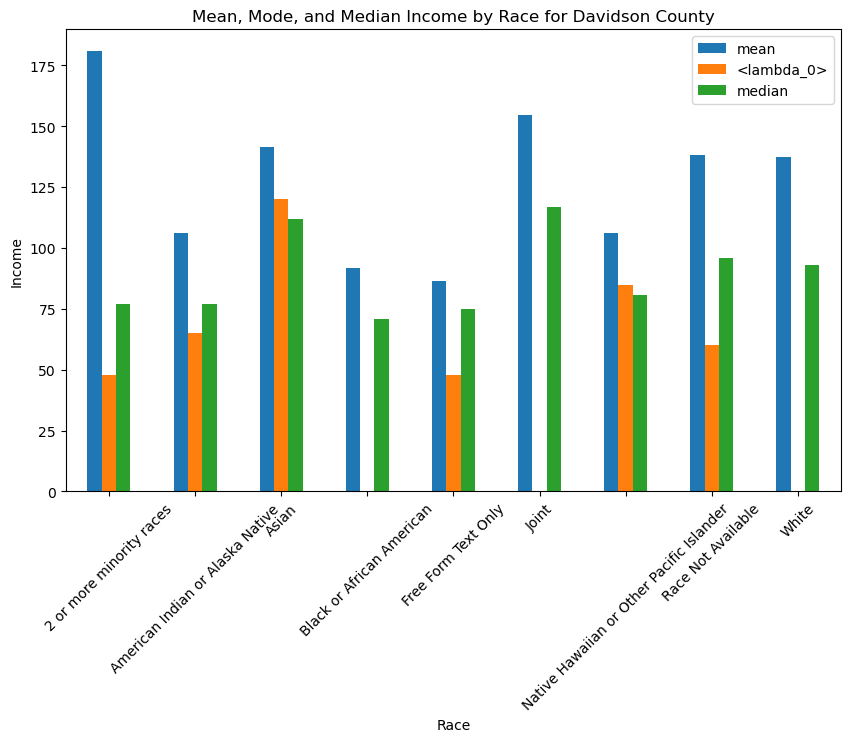

In [93]:
# create a bar plot of the results
ax = grouped2.plot(kind="bar", figsize=(10, 6))

# set the plot title and axis labels
ax.set_title("Mean, Mode, and Median Income by Race for Davidson County")
ax.set_xlabel("Race")
ax.set_ylabel("Income")
plt.xticks(rotation=45)
plt.show()
#the median figure is most appropriate in this analysis as the median accounts for and levels off any outliers.
#Asian have the highest level of income and African Americans have the lowest level. Joint, Race Not Available, 
# and Free Form Text only does not provide information of the race of the borrowers.

Shelby County

In [94]:
# filter the dataframe to include only Davidson and Shelby counties
counties = ["Shelby"]
df = demographics[demographics["county"].isin(counties)]

# group the dataframe by derived_race and calculate the mean, mode, and median income for each group
grouped3 = df.groupby("race")["income"].agg(["mean", lambda x: x.mode()[0], "median"])

# print the results
grouped3

,mean,<lambda_0>,median
race,,,
2 or more minority races,95.336449,111.0,78.0
American Indian or Alaska Native,102.601852,54.0,68.5
Asian,152.396203,125.0,122.0
Black or African American,90.677901,0.0,68.0
Free Form Text Only,56.500000,36.0,57.5
Joint,140.864177,129.0,120.0
Native Hawaiian or Other Pacific Islander,86.102041,84.0,79.0
Race Not Available,129.685993,0.0,94.0
White,130.272181,0.0,97.5


In [95]:
grouped3.rename(columns = {'<lambda_0>':'mode'})

,mean,mode,median
race,,,
2 or more minority races,95.336449,111.0,78.0
American Indian or Alaska Native,102.601852,54.0,68.5
Asian,152.396203,125.0,122.0
Black or African American,90.677901,0.0,68.0
Free Form Text Only,56.500000,36.0,57.5
Joint,140.864177,129.0,120.0
Native Hawaiian or Other Pacific Islander,86.102041,84.0,79.0
Race Not Available,129.685993,0.0,94.0
White,130.272181,0.0,97.5


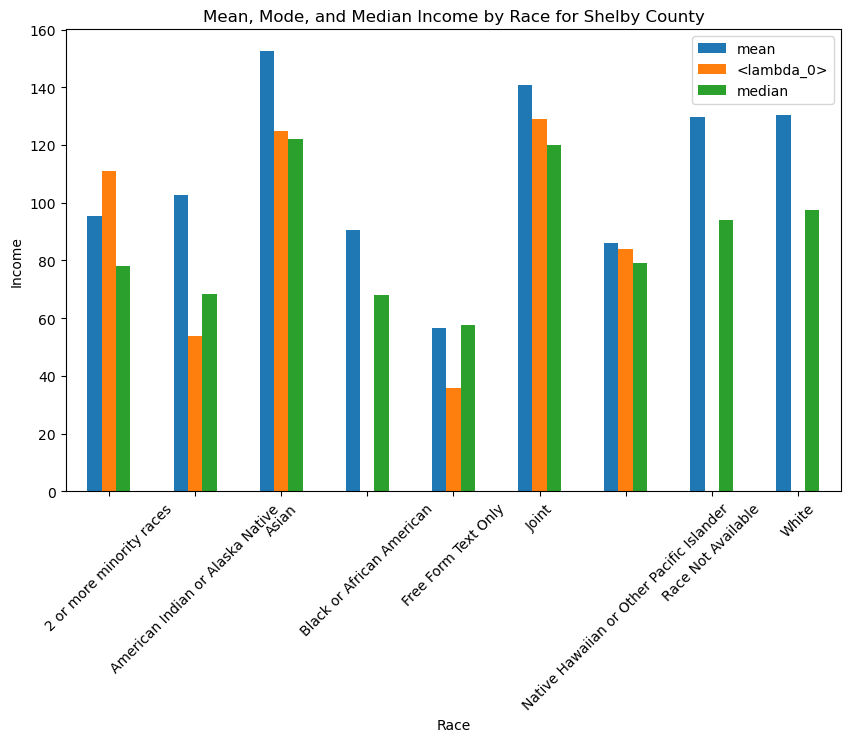

In [96]:
# create a bar plot of the results
ax = grouped3.plot(kind="bar", figsize=(10, 6))

# set the plot title and axis labels
ax.set_title("Mean, Mode, and Median Income by Race for Shelby County")
ax.set_xlabel("Race")
ax.set_ylabel("Income")
plt.xticks(rotation=45)
plt.show()

Joint, Race Not Available, and Free Form Text only does not provide information of the race of the borrowers.
So I will exclude these rows 

Davidson

In [97]:
demographics['income'] = pd.to_numeric(demographics['income'], errors='coerce').fillna(0).astype('int64')

C:\Users\chern\AppData\Local\Temp\ipykernel_3452\777969739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics['income'] = pd.to_numeric(demographics['income'], errors='coerce').fillna(0).astype('int64')


In [98]:
# Specify the races to exclude
excluded_races = ["Free Form Text Only", "Joint", "Race Not Available"]

# Filter the dataframe to only include rows with race, county, and income data, and exclude certain races
filtered_df = demographics[demographics['race'].isin(set(df['race']) - set(excluded_races)) &
                 demographics['county'].isin(["Davidson"]) &
                 demographics['income'].notnull()]

# Group the filtered dataframe by race and county, and calculate the mean, mode, and median income
davidson_df = filtered_df.groupby(['race', 'county'])['income'].agg([np.mean, lambda x: x.mode()[0], np.median])

# Display the result
davidson_df.sort_values('median', ascending=False)

,,mean,<lambda_0>,median
race,county,,,
Asian,Davidson,138.090635,0,110.0
White,Davidson,129.939509,0,88.0
Native Hawaiian or Other Pacific Islander,Davidson,97.910256,0,76.5
2 or more minority races,Davidson,167.805195,0,73.5
American Indian or Alaska Native,Davidson,97.194656,0,73.0
Black or African American,Davidson,81.344534,0,65.0


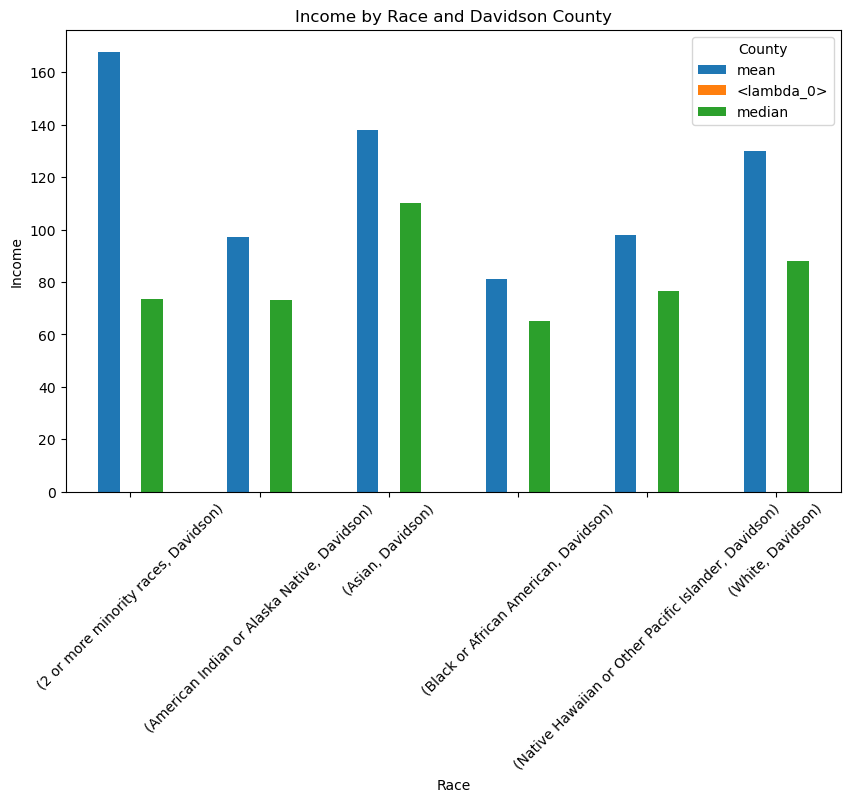

In [99]:
davidson_df.plot(kind='bar', rot=0, figsize=(10, 6))
plt.title('Income by Race and Davidson County')
plt.xlabel('Race')
plt.ylabel('Income')
plt.legend(title='County')
plt.xticks(rotation=45)
plt.show()

Memphis

In [100]:
# Specify the races to exclude
excluded_races = ["Free Form Text Only", "Joint", "Race Not Available"]

# Filter the dataframe to only include rows with race, county, and income data, and exclude certain races
filtered_df = demographics[demographics['race'].isin(set(df['race']) - set(excluded_races)) &
                 demographics['county'].isin(["Shelby"]) &
                 demographics['income'].notnull()]

# Group the filtered dataframe by race and county, and calculate the mean, mode, and median income
shelby_df = filtered_df.groupby(['race', 'county'])['income'].agg([np.mean, lambda x: x.mode()[0], np.median])

# Display the result
shelby_df.sort_values('median', ascending=False)

,,mean,<lambda_0>,median
race,county,,,
Asian,Shelby,149.494619,0,121.0
White,Shelby,122.103617,0,92.0
Native Hawaiian or Other Pacific Islander,Shelby,76.709091,0,73.0
2 or more minority races,Shelby,82.266129,0,67.5
Black or African American,Shelby,78.520744,0,61.0
American Indian or Alaska Native,Shelby,84.587786,0,56.0


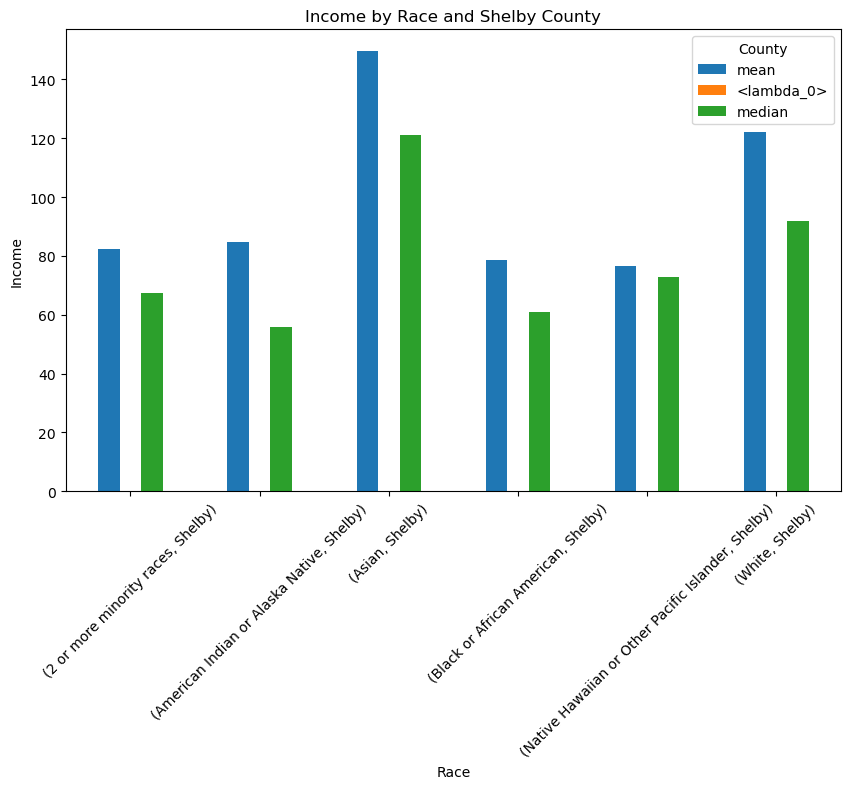

In [101]:
shelby_df.plot(kind='bar', rot=0, figsize=(10, 6))
plt.title('Income by Race and Shelby County')
plt.xlabel('Race')
plt.ylabel('Income')
plt.legend(title='County')
plt.xticks(rotation=45)
plt.show()

# What does the data say about race and the purpose of the mortgage? 

Davidson 

In [102]:
# Specify the counties to include
county = ["Davidson"]

# Filter the dataframe to only include rows with purpose of loan and county data, and for specified counties
filtered_df = demographics[demographics['purpose'].notnull() & demographics['county'].isin(county)]

# Group the filtered dataframe by purpose of loan and race, and count the number of unique races
davidson_pur = filtered_df.groupby(['purpose', 'race'])['race'].count()

# Print the result dataframe
davidson_pur

purpose          race                                     
Cash-out Ref     2 or more minority races                        36
                 American Indian or Alaska Native               122
                 Asian                                          778
                 Black or African American                     3035
                 Free Form Text Only                              1
                 Joint                                          419
                 Native Hawaiian or Other Pacific Islander       24
                 Race Not Available                           10952
                 White                                        26383
Home Improvment  2 or more minority races                         5
                 American Indian or Alaska Native                23
                 Asian                                          127
                 Black or African American                      336
                 Joint                                   

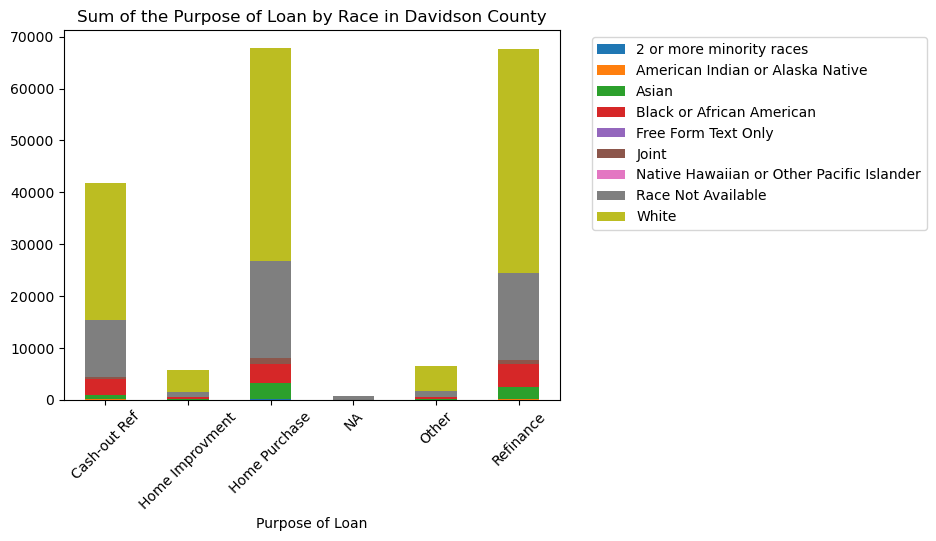

In [103]:
# Unstack the result dataframe to make purpose of loan the x-axis and race the stacked bars
davidson_pur.unstack().plot.bar(stacked=True)

# Set the x-axis label and title
plt.xlabel('Purpose of Loan')
plt.title('Sum of the Purpose of Loan by Race in Davidson County')
# Move the legend off to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
# Show the plot
plt.show()

Shelby

In [104]:
# Specify the counties to include
county = ["Shelby"]

# Filter the dataframe to only include rows with purpose of loan and county data, and for specified counties
filtered_df1 = demographics[demographics['purpose'].notnull() & demographics['county'].isin(county)]

# Group the filtered dataframe by purpose of loan and race, and count the number of unique races
shelby_pur = filtered_df1.groupby(['purpose', 'race'])['race'].count()

# Print the result dataframe
shelby_pur

purpose          race                                     
Cash-out Ref     2 or more minority races                       25
                 American Indian or Alaska Native               25
                 Asian                                         275
                 Black or African American                    2378
                 Joint                                          91
                 Native Hawaiian or Other Pacific Islander      14
                 Race Not Available                           3119
                 White                                        5868
Home Improvment  American Indian or Alaska Native                2
                 Asian                                          43
                 Black or African American                     405
                 Joint                                          11
                 Native Hawaiian or Other Pacific Islander       5
                 Race Not Available                            242
   

#Shelby County is predominantly African American, however if such a county African American home purchase/homeownership
#is not the predominant. 21,918 applications were approved for the purchase of a home. African Americans only made up 18.27% 
#of the market for new home purchases, while Whites made up 43.43% of the market. This is concerning and is worthly further 
#research. 

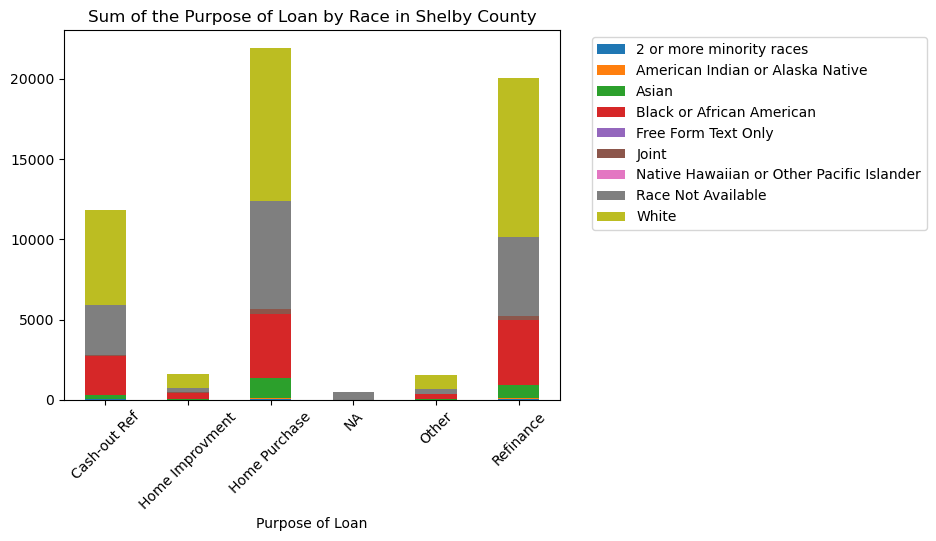

In [105]:
# Unstack the result dataframe to make purpose of loan the x-axis and race the stacked bars
shelby_pur.unstack().plot.bar(stacked=True)

# Set the x-axis label and title
plt.xlabel('Purpose of Loan')
plt.title('Sum of the Purpose of Loan by Race in Shelby County')
# Move the legend off to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [106]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501135 entries, 0 to 564410
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   lei                501135 non-null  object
 1   institution        307338 non-null  object
 2   county             501135 non-null  object
 3   race               501135 non-null  object
 4   sex                501135 non-null  object
 5   coapp_sex          501135 non-null  object
 6   loan               501135 non-null  object
 7   purpose            501135 non-null  object
 8   ltv                309870 non-null  object
 9   term               498243 non-null  object
 10  value              384598 non-null  object
 11  income             501135 non-null  int64 
 12  dti                303318 non-null  object
 13  b1_age             501135 non-null  object
 14  b2_age             501135 non-null  object
 15  pop_2021           501135 non-null  int64 
 16  median_family_inc  5

# Redlining also plays a part with LTV, loan amount, and property value.  There were decades of legalized racial discrimination which hampered the accumulation of wealth among non-whites. An LTV over 80% would require borrowers to obtain mortgage insurance, but with the combination of race, LTV,  and property value per county, does anything stand out? 

Davidson 

In [107]:
demographics['ltv'] = pd.to_numeric(demographics['ltv'], errors='coerce').fillna(0).astype('int64')

C:\Users\chern\AppData\Local\Temp\ipykernel_3452\100026357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics['ltv'] = pd.to_numeric(demographics['ltv'], errors='coerce').fillna(0).astype('int64')


In [108]:
# Filter the dataframe to only include rows with county = Davidson and race is not "Free Form Text Only", "Joint", or "Race Not Available"
filtered_df2 = demographics[(demographics['county'] == 'Davidson') & (~demographics['race'].isin(['Free Form Text Only', 'Joint', 'Race Not Available']))]

# Add a new column to the filtered dataframe that categorizes LTV values into "low", "moderately low", and "high"
filtered_df2['ltv_category'] = pd.cut(filtered_df2['ltv'], bins=[0, 60, 80, 100], labels=['low', 'moderately low', 'high'])

# Group the filtered dataframe by race, ltv category, and property value and count the number of unique values
davidson_combo = filtered_df2.groupby(['race', 'ltv', 'value'])['race'].nunique()

# Print the resulting dataframe
print(davidson_combo)


race                      ltv  value   
2 or more minority races  0    255000.0    1
                               295000.0    1
                               305000.0    1
                               785000.0    1
                               205000      1
                                          ..
White                     166  95000.0     1
                          168  295000      1
                          181  305000      1
                          193  295000      1
                          205  135000      1
Name: race, Length: 22969, dtype: int64


C:\Users\chern\AppData\Local\Temp\ipykernel_3452\3447504761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['ltv_category'] = pd.cut(filtered_df2['ltv'], bins=[0, 60, 80, 100], labels=['low', 'moderately low', 'high'])


Davidson 

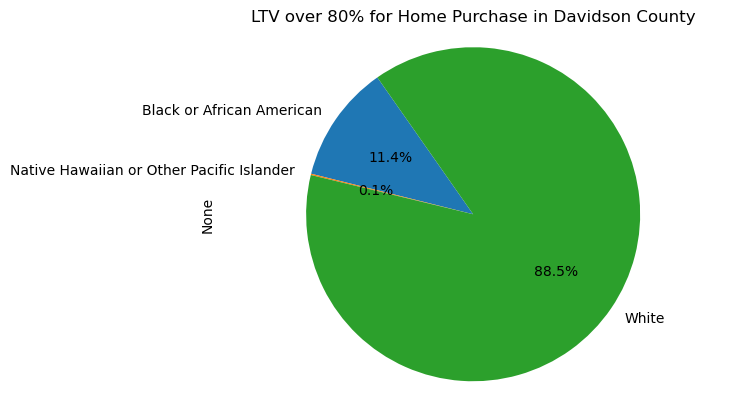

In [109]:
# create a boolean mask for the conditions
mask = (demographics['race'].isin(['Free Form Text Only', 'Joint', 'Race Not Available']) == False) & \
       (demographics['ltv'] > 80) & \
       (demographics['purpose'] == 'Home Purchase') & \
       (demographics['county'] == 'Davidson')

# apply the mask and group by race
counts_by_race = demographics[mask].groupby('race').size().tail(3)

# create a pie plot
counts_by_race.plot(kind='pie', y='race', autopct='%1.1f%%', startangle=125)
plt.axis('equal')
plt.title('LTV over 80% for Home Purchase in Davidson County')
plt.show()

Shelby

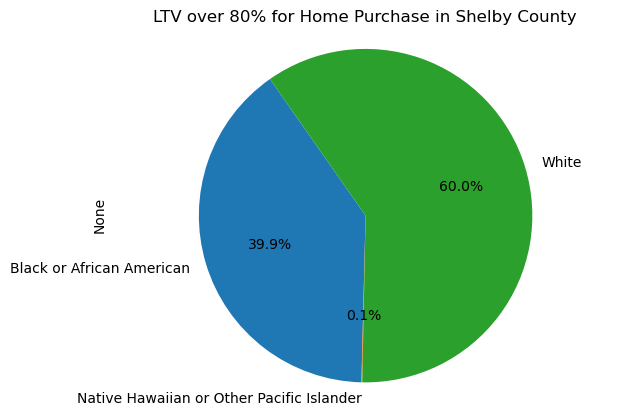

In [110]:
# create a boolean mask for the conditions
mask1 = (demographics['race'].isin(['Free Form Text Only', 'Joint', 'Race Not Available']) == False) & \
       (demographics['ltv'] > 80) & \
       (demographics['purpose'] == 'Home Purchase') & \
       (demographics['county'] == 'Shelby')

# apply the mask and group by race
counts_by_race1 = demographics[mask1].groupby('race').size().tail(3)

# create a pie plot
counts_by_race1.plot(kind='pie', y='race', autopct='%1.1f%%', startangle=125)
plt.axis('equal')
plt.title('LTV over 80% for Home Purchase in Shelby County')
plt.show()

In [111]:
counts_by_race # for Davidson County 

race
Black or African American                     2190
Native Hawaiian or Other Pacific Islander       24
White                                        17036
dtype: int64

In [112]:
counts_by_race1 #for Shelby County 

race
Black or African American                    2508
Native Hawaiian or Other Pacific Islander       5
White                                        3776
dtype: int64

In [113]:
#These figures are proportional to the number of white borrowers. Home purchases among the White borrower dominated in both 
#Davidson and Shelby County. I do thing is worth deeper research perhaps into why African Americans are not seeking homeowner.
#It is very likely there are other factors that determine homeownership among minority groups.

If we look into under 80%, this would show use who among the races is accumlating more equity per county

Davidson

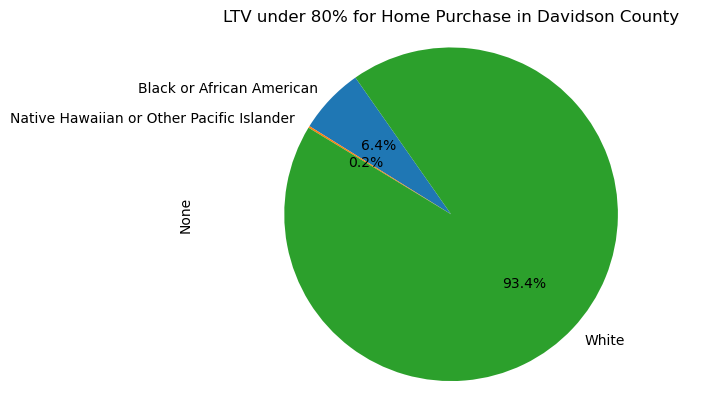

In [114]:
# create a boolean mask for the conditions
mask3 = (demographics['race'].isin(['Free Form Text Only', 'Joint', 'Race Not Available']) == False) & \
       (demographics['ltv'] < 80) & \
       (demographics['purpose'] == 'Home Purchase') & \
       (demographics['county'] == 'Davidson')

# apply the mask and group by race
counts_by_race3 = demographics[mask3].groupby('race').size().tail(3)

# create a pie plot
counts_by_race3.plot(kind='pie', y='race', autopct='%1.1f%%', startangle=125)
plt.axis('equal')
plt.title('LTV under 80% for Home Purchase in Davidson County')
plt.show()

Shelby 

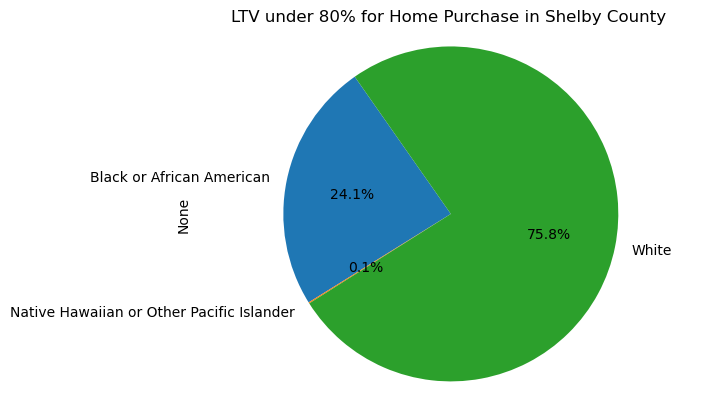

In [115]:
# create a boolean mask for the conditions
mask4 = (demographics['race'].isin(['Free Form Text Only', 'Joint', 'Race Not Available']) == False) & \
       (demographics['ltv'] < 80) & \
       (demographics['purpose'] == 'Home Purchase') & \
       (demographics['county'] == 'Shelby')

# apply the mask and group by race
counts_by_race4 = demographics[mask4].groupby('race').size().tail(3)

# create a pie plot
counts_by_race4.plot(kind='pie', y='race', autopct='%1.1f%%', startangle=125)
plt.axis('equal')
plt.title('LTV under 80% for Home Purchase in Shelby County')
plt.show()

In [116]:
#African Americans hold just under 25% of the  market share for LTV under 80%. This would mean that these borrowers have a 
#significant opportunity to accumulate wealth. Whites hold over 75% of the market share for LTV under 80%. This also is 
#worth deeper research. The question that remains is which do Whites have more equity in a home purchase than do African Americans
#especially since African Americans make up the majority race in Shelby County? What other factors are contributing to more home
#equity for Whites in comparison to all the other races? What were the sources of the down payment or additional? What type of assets do
#borrowers have per race? 

In [117]:
counts_by_race3

race
Black or African American                     1250
Native Hawaiian or Other Pacific Islander       34
White                                        18186
dtype: int64

In [118]:
counts_by_race4

race
Black or African American                    1316
Native Hawaiian or Other Pacific Islander       6
White                                        4130
dtype: int64

In [119]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501135 entries, 0 to 564410
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   lei                501135 non-null  object
 1   institution        307338 non-null  object
 2   county             501135 non-null  object
 3   race               501135 non-null  object
 4   sex                501135 non-null  object
 5   coapp_sex          501135 non-null  object
 6   loan               501135 non-null  object
 7   purpose            501135 non-null  object
 8   ltv                501135 non-null  int64 
 9   term               498243 non-null  object
 10  value              384598 non-null  object
 11  income             501135 non-null  int64 
 12  dti                303318 non-null  object
 13  b1_age             501135 non-null  object
 14  b2_age             501135 non-null  object
 15  pop_2021           501135 non-null  int64 
 16  median_family_inc  5

# What does the data reveal about the borrower’s age, race, and family income? 

Davidson 

race                                       b1_age
2 or more minority races                   25-34        41
                                           35-44        35
                                           45-54        32
                                           55-64        22
                                           65-74        13
                                           <25           2
                                           >74           6
American Indian or Alaska Native           25-34        98
                                           35-44       146
                                           45-54       111
                                           55-64        92
                                           65-74        45
                                           <25          12
                                           >74          10
Asian                                      25-34      1460
                                           35-44      2575
      

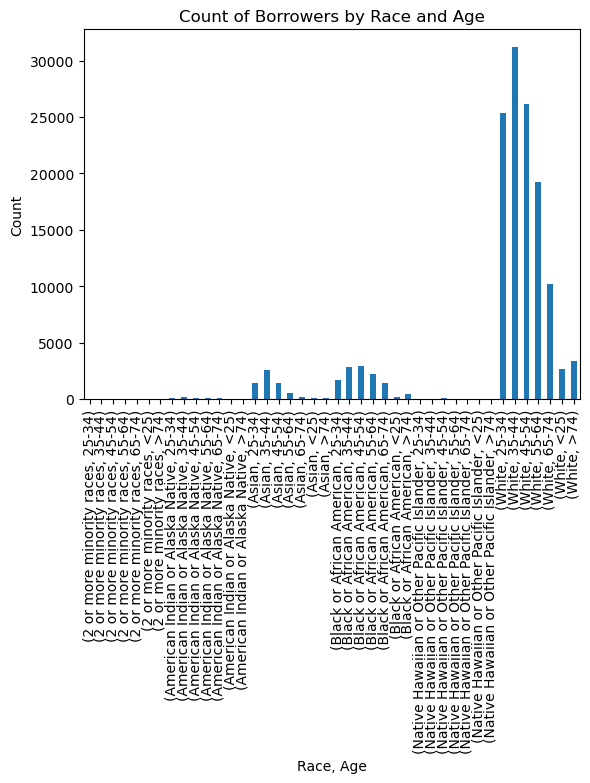

In [120]:
# create a boolean mask for the conditions
mask5 = (demographics['race'].isin(['Free Form Text Only', 'Joint', 'Race Not Available']) == False) & \
       (demographics['county'] == 'Davidson') & \
       (demographics['b1_age'] != '8888')

# apply the mask
filtered_df5 = demographics[mask5]

# group by race and b1_age
grouped_df5 = filtered_df5.groupby(['race', 'b1_age']).size()

# print the result
print(grouped_df5)


# plot the result
grouped_df5.plot(x=['race', 'age'], y='count', kind='bar')
plt.xlabel('Race, Age')
plt.ylabel('Count')
plt.title('Count of Borrowers by Race and Age')
plt.show()

#the highest age group for Whites are from 35-44 years of age and for African Americans 45-54. This is only a snap shot of year 
#2021. To determine the % change in approved mortgages we would need additional data for at least the past 5 years. 

Shelby 

race                                       b1_age
2 or more minority races                   25-34       19
                                           35-44       18
                                           45-54       46
                                           55-64       23
                                           65-74       10
                                           <25          3
                                           >74          5
American Indian or Alaska Native           25-34       19
                                           35-44       33
                                           45-54       25
                                           55-64       26
                                           65-74       16
                                           <25          4
                                           >74          4
Asian                                      25-34      455
                                           35-44     1025
                      

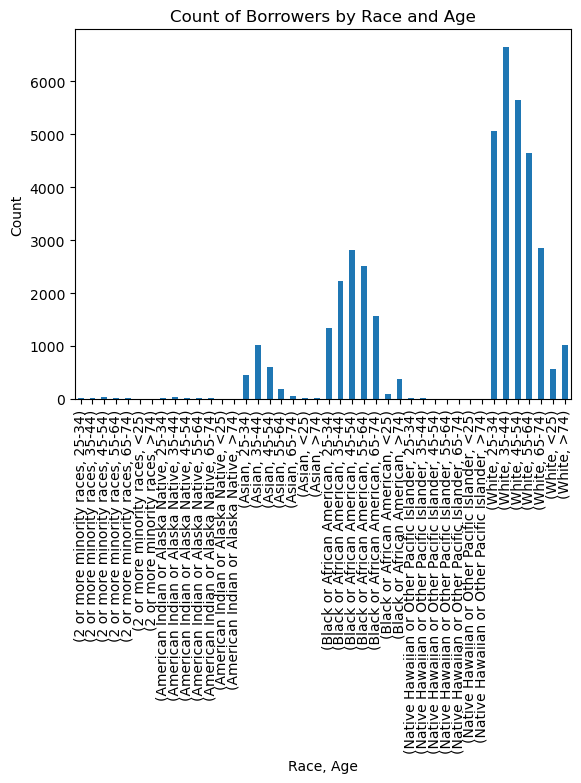

In [121]:
# create a boolean mask for the conditions
mask6 = (demographics['race'].isin(['Free Form Text Only', 'Joint', 'Race Not Available']) == False) & \
       (demographics['county'] == 'Shelby') & \
       (demographics['b1_age'] != '8888')

# apply the mask
filtered_df6 = demographics[mask6]

# group by race and b1_age
grouped_df6 = filtered_df6.groupby(['race', 'b1_age']).size()

# print the result
print(grouped_df6)


# plot the result
grouped_df6.plot(x=['race', 'age'], y='count', kind='bar')
plt.xlabel('Race, Age')
plt.ylabel('Count')
plt.title('Count of Borrowers by Race and Age')
plt.show()

demographics.to_csv("demographics.csv")